# Lab Animal Health Risk Prediction

## Phase 1 — Project Setup  

### 1. Project Objectives

**Research Problem**  
Develop a **reproducible, modular pipeline** to quantify laboratory animal health by integrating multiple measurable indicators into a **composite Health Score (0–100)**. Animals are categorized into **Low, Medium, or High Risk**.  

**Design Principle: Species-Agnostic Adaptability**  
- Retrainable across multiple species (rats, mice, rabbits, guinea pigs) with minimal modification.  
- Ensures broad **translational applicability** in biomedical research.  

![Laboratory Rats](https://assets.www.criver.com/storage-account-container/content/uploads/032519_Lab_Rat_History.jpg)  
*Courtesy of [Charles River](https://www.criver.com/eureka/the-early-history-of-the-lab-rat)*

**Key Benefits:**  
- **Health Data Automation:** Transforms raw logs (age, weight, activity, food/water intake, strain, sex) into interpretable Health Scores.  
- **Veterinary Monitoring Automation:** Automatically identifies at-risk animals, generates reports, and visualizes risk distributions.  

---

### 2. Rationale for Initial Species Choice

**Why Rats?**  
- Widely used in **toxicology, pharmacology, and biomedical research**.  
- Strains: **Long Evans (LE), Sprague Dawley (SD), Fischer 344 (F344), Brown Norway (BN)**.  
- Physiological and behavioral diversity provides a robust testbed for evaluating **generalizability**.  

---

### 3. Evolution of Modeling Strategy

**Initial Approach — Supervised Learning:**  
- Models: Linear Regression, Logistic Regression, Random Forests.  
- Challenge: **Severe class imbalance**; synthetic oversampling produced biologically implausible data.  

**Pivot — Unsupervised & Anomaly Detection:**  
- Methods: **KMeans clustering + Isolation Forest**.  
- Advantages: Produces **biologically plausible risk distributions**, reduces overfitting, and captures rare events.  

> **Note:** Unsupervised ML approaches are ideally applied to **real-world data**. In this project, I generated synthetic data that mimics realistic distributions, incorporating **missing values, randomness, and anomalies** to approximate true laboratory populations as closely as possible.  

---

### 4. Final Model Components

**Encoders:**  
- `le_strain` → LabelEncoder for strain  
- `le_sex` → LabelEncoder for sex  

**Scaler:**  
- `scaler_numeric` → MinMaxScaler for numeric features  

**Dimensionality Reduction:**  
- `pca` → Principal Component Analysis (2 components)  
- `umap` → Uniform Manifold Approximation & Projection (2D embedding)  

**Clustering & Anomaly Detection:**  
- `kmeans` → KMeans clustering (3 clusters)  
- `iso_forest` → Isolation Forest for outlier detection  

> All models are saved in `models/encoders/scalers` for reproducibility.

---

### 5. Significance of Health Risk Prediction

**Ethical & Welfare:**  
- Supports humane endpoints and refined animal care (aligns with the 3Rs).  

**Scientific Validity:**  
- Reduces inter-animal variability → enhances reproducibility and statistical power.  

**Operational Efficiency:**  
- Automates veterinary prioritization for early interventions.  

**Regulatory Compliance:**  
- Generates quantifiable metrics for IACUC/AAALAC audits and inspections.  

---

### 6. Project Continuity

- Builds on prior work:  
  - [**Lab Animal Growth Prediction**](https://github.com/Ibrahim-El-Khouli/Lab-Animal-Growth-Prediction) 
  - [**LECI — Lab Environmental Comfort Index**](https://github.com/Ibrahim-El-Khouli/LECI-Lab-Environmental-Comfort-Index.git)  
- Advances to **health risk prediction** with:  
  - Unsupervised learning  
  - Anomaly detection  
  - Automated reporting  
  - Dashboard integration  

> This represents a **next-generation pipeline** for laboratory animal health monitoring, surpassing prior growth models in sophistication, interpretability, and translational potential

### Importing Libraries and Setup Environment

A reproducible and structured computational environment is essential for ensuring transparency and scientific rigor. This step establishes the software foundation for the project, with emphasis on unsupervised learning, anomaly detection, and reproducibility.

---

#### 1. Standard Library Imports
- **os**: file and directory management, particularly for saving models and outputs.  
- **random, numpy.random**: random number generation for reproducibility in sampling and synthetic dataset creation.  
- **sys**: system-level operations and environment configuration.  
- **warnings**: manage and suppress non-critical warnings for cleaner outputs.  

---

#### 2. Numerical and Data Handling
- **NumPy**: high-performance numerical operations, array manipulation, and matrix computations.  
- **Pandas**: tabular data structures (DataFrames) for wrangling, feature engineering, and seamless integration with machine learning workflows.  

---

#### 3. Visualization
- **Matplotlib & Seaborn**: core plotting tools for exploratory and publication-quality static visualizations.  
- **Missingno**: visual inspection of missing data patterns and quality control.  
- **Plotly Express**: interactive visualizations for dashboard development and exploratory analysis.  
- **Parallel Coordinates (pandas.plotting)**: multivariate visualization to assess feature distributions across clusters.  

*Default Seaborn style is set to ensure visual consistency throughout analyses.*  

---

#### 4. Machine Learning (Unsupervised and Anomaly Detection)
- **Clustering**:  
  - `KMeans` for partitioning data into latent health profiles.  
- **Anomaly Detection**:  
  - `IsolationForest` and `OneClassSVM` for identifying animals with atypical health patterns.  
- **Dimensionality Reduction**:  
  - `PCA` (linear reduction, variance-preserving).  
  - `UMAP` (non-linear manifold learning, preserving local structure).  
- **Preprocessing**:  
  - `SimpleImputer` for handling missing values.  
  - `MinMaxScaler` for scaling numeric features.  
  - `OrdinalEncoder` / `LabelEncoder` for categorical variables (e.g., strain, sex).  
- **Pipelines**:  
  - `Pipeline` for reproducible, modular preprocessing and modeling.  
- **Cluster Evaluation**:  
  - `silhouette_score` to assess cluster quality and separation.  

---

#### 5. Utilities
- **joblib**: efficient serialization and persistence of scalers, encoders, dimensionality reduction transforms, and trained models.  

---

#### 6. Warnings and Environment Setup
- Suppresses non-critical warnings (e.g., from UMAP or future deprecations in scikit-learn) to keep notebooks clean and focused on interpretable outputs.  

---

#### 7. Reproducibility
- **Random Seed Control**: Global seeding of Python’s `random`, NumPy RNG, and environment-level hashing guarantees deterministic outputs across runs.  
- This ensures **reproducible analyses**, which is essential in biomedical research where regulatory standards demand traceability of results.  

---

#### Research Rationale
This configuration reflects the methodological pivot from supervised approaches to **unsupervised modeling and anomaly detection**, directly aligning with the project’s objective of deriving biologically plausible health risk categories without reliance on imbalanced labels. The modular imports and reproducibility safeguards position the pipeline for both experimental exploration and eventual deployment in veterinary biomedical contexts.


In [23]:
# ===============================
# Standard Library Imports
# ===============================
import os
import random
import sys
import warnings

# ===============================
# Numerical & Data Handling
# ===============================
import numpy as np
import pandas as pd

# ===============================
# Visualization
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from pandas.plotting import parallel_coordinates

# Set default Seaborn style for all plots
sns.set(style="whitegrid", palette="muted", context="notebook")

# ===============================
# Machine Learning (Unsupervised)
# ===============================
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

# ===============================
# Dimensionality Reduction
# ===============================
import umap

# ===============================
# Utilities
# ===============================
import joblib

# ===============================
# Warnings & Environment Setup
# ===============================
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="umap")

# ===============================
# Reproducibility
# ===============================
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ["PYTHONHASHSEED"] = str(RANDOM_SEED)

# Phase 2 — Data Creation & Exploration  
## Step 1: Synthetic Dataset Generation  

### Biological / Veterinary Rationale  
In laboratory animal studies, researchers monitor physiological and behavioral traits such as **weight, age, activity level, food intake, and water intake**. These features are not independent — they follow well-established biological patterns:  
- **Age vs. Weight**: Older rodents tend to be heavier but often exhibit reduced activity.  
- **Strain Differences**: Common strains such as *Sprague Dawley* and *Brown Norway* show consistent variations in metabolism, growth, and behavior.  
- **Sex Differences**: Male and female animals often differ in growth curves and feeding behavior.  
- **Outliers/At Risk (Sick/Anomalous Animals)**: In real colonies, some animals deviate significantly due to illness, genetic variation, or environmental stressors. These anomalies are biologically meaningful and often the focus of veterinary attention.  

Since we currently have no access to real-world data, the dataset will be generated synthetically. To ensure credibility, we will design it to follow realistic biological correlations and refine it repeatedly until it closely resembles real data.  

---

### Machine Learning Rationale  
From a machine learning standpoint, constructing a **synthetic dataset of 1000 animals** with structured features allows us to:  
- **Simulate realistic correlations** between variables (e.g., multicollinearity of age, weight, and activity).  
- **Inject controlled noise and anomalies** to mimic real-world irregularities, which is essential for downstream anomaly detection tasks.  
- **Balance categorical features** (strain, sex) to ensure fair representation in clustering and unsupervised learning models.  
- **Enable robust visualization and validation**, making it possible to test dimensionality reduction, clustering, and anomaly detection methods in a controlled, biologically inspired setting.  


In [25]:
# ==============================
# Step 1: Synthetic Dataset Generation
# ==============================

# ------------------------------
# 1. Setup & Reproducibility
# ------------------------------
np.random.seed(42)   # Ensure results are reproducible

# Number of animals to simulate
n_animals = 1000   # Large enough to be realistic but manageable computationally

# Define biological categories
strains = ["Long Evans", "Sprague Dawley", "Fischer 344", "Brown Norway"]
sexes = ["Male", "Female"]

# ------------------------------
# 2. Age Distribution
# ------------------------------
# Simulate ages (in days), normally distributed around 300 days (~10 months),
# with minimum of 2 months (60 days) and maximum of ~24 months (730 days).
age = np.random.normal(loc=300, scale=100, size=n_animals).clip(60, 730)

# ------------------------------
# 3. Sex Assignment
# ------------------------------
# Randomly assign each animal as Male or Female
sex = np.random.choice(sexes, size=n_animals)

# ------------------------------
# 4. Weight (g)
# ------------------------------
# Weight depends on sex and age:
# - Males start heavier than females
# - Both sexes gain weight with age
# - Added random variation (noise) to simulate biological variability
weight = np.zeros(n_animals)
for i in range(n_animals):
    base_weight = 200 if sex[i] == 'Female' else 300
    weight[i] = (base_weight + 0.6 * age[i] + np.random.normal(0, 20)).clip(150, 500)

# ------------------------------
# 5. Activity Level (0–10 scale)
# ------------------------------
# Younger animals are more active; activity declines with age
# Added variability to reflect individual differences
activity = (10 - (age / 100) + np.random.normal(0, 1.5, n_animals)).clip(0, 10)

# ------------------------------
# 6. Food Intake (g/day)
# ------------------------------
# Strongly correlated with activity: more active animals eat more
food_intake = (15 + 1.2 * activity + np.random.normal(0, 2, n_animals)).clip(10, 25)

# ------------------------------
# 7. Water Intake (ml/day)
# ------------------------------
# Correlated with food intake: animals eating more also drink more
water_intake = (30 + 2 * food_intake + np.random.normal(0, 5, n_animals)).clip(20, 70)

# ------------------------------
# 8. Strain Assignment
# ------------------------------
# Randomly assign each animal to one of the defined strains
strain = np.random.choice(strains, size=n_animals)

# ------------------------------
# 9. Build Final Dataset
# ------------------------------
# Combine all features into a structured DataFrame
data = pd.DataFrame({
    "Age(days)": age.round(0).astype(int),
    "Weight(g)": weight.round(1),
    "Activity": activity.round(1),
    "Food Intake(g/d)": food_intake.round(1),
    "Water Intake(ml/d)": water_intake.round(1),
    "Sex": sex,
    "Strain": strain
})

# ------------------------------
# 10. Introduce 'At-Risk' Animals (~3%)
# ------------------------------
# To simulate illness or poor health, select ~3% of animals as "at risk"
n_at_risk = int(0.03 * n_animals)
at_risk_indices = np.random.choice(data.index, n_at_risk, replace=False)

# Apply reductions to simulate poor health:
# - Underweight (~50% of expected)
# - Low food & water intake (~50% of expected)
# - Low activity (~30% of expected)
data.loc[at_risk_indices, 'Weight(g)'] *= 0.5
data.loc[at_risk_indices, 'Food Intake(g/d)'] *= 0.5
data.loc[at_risk_indices, 'Water Intake(ml/d)'] *= 0.5
data.loc[at_risk_indices, 'Activity'] *= 0.3

# Add binary label column "At Risk"
data["At Risk"] = False
data.loc[at_risk_indices, "At Risk"] = True

# ------------------------------
# 11. Preview Dataset
# ------------------------------
data

Age(days)  Weight(g)  Activity  Food Intake(g/d)  Water Intake(ml/d)  \
0          350      500.0       6.4              25.0                70.0   
1          286      375.4       5.0              18.2                59.6   
2          365      491.9       5.0              22.0                69.4   
3          452      451.9       4.0              22.7                70.0   
4          277      490.0       7.5              25.0                70.0   
..         ...        ...       ...               ...                 ...   
995        272      383.8       7.5              25.0                69.1   
996        480      500.0       2.8              19.4                65.4   
997        364      399.9       5.2              22.8                70.0   
998        243      415.8       7.5              24.6                70.0   
999        357      500.0       6.3              21.5                70.0   

        Sex          Strain  At Risk  
0      Male      Long Evans    False  
1    Female  Sprague Dawley    False  
2      Male     Fischer 344    False  
3    Female      Long Evans    False  
4      Male     Fischer 344    False  
..      ...             ...      ...  
995  Female     Fischer 344    False  
996    Male    Brown Norway    False  
997  Female    Brown Norway    False  
998    Male    Brown Norway    False  
999    Male      Long Evans    False  

[1000 rows x 8 columns]

## Phase 2 — Data Creation & Exploration  
### Step 2: Visualization of Synthetic Dataset  

Once the synthetic dataset has been generated, the next step is to **visualize the distributions** of key features.  
Visualization serves two complementary purposes:  

1. **Biological/Veterinary Rationale:**  
   - Allows us to confirm whether the simulated data follow expected biological patterns (e.g., age distribution, sex-related weight differences, activity declining with age).  
   - Helps in detecting whether the **“at-risk” animals** exhibit biologically plausible deviations (lower weight, reduced activity, reduced food/water intake).  
   - Supports face-validity checks before applying any machine learning models.  

---

2. **Machine Learning Rationale:**  
   - Ensures that feature distributions are not overly skewed or unrealistic, which could bias clustering/anomaly detection.  
   - Identifies correlations and separability between “at-risk” and “healthy” animals.  
   - Serves as an early form of exploratory data analysis (EDA), guiding the next steps in preprocessing and modeling.  

In this step, we will:  
- Plot **histograms/KDEs** for all numerical features to examine distributions and highlight differences between healthy vs at-risk animals.  
- Generate **pairplots** to inspect relationships between features (e.g., weight vs age, food vs water intake).  
These visualizations help confirm that our synthetic dataset resembles realistic biological data while also being informative for machine learning.  


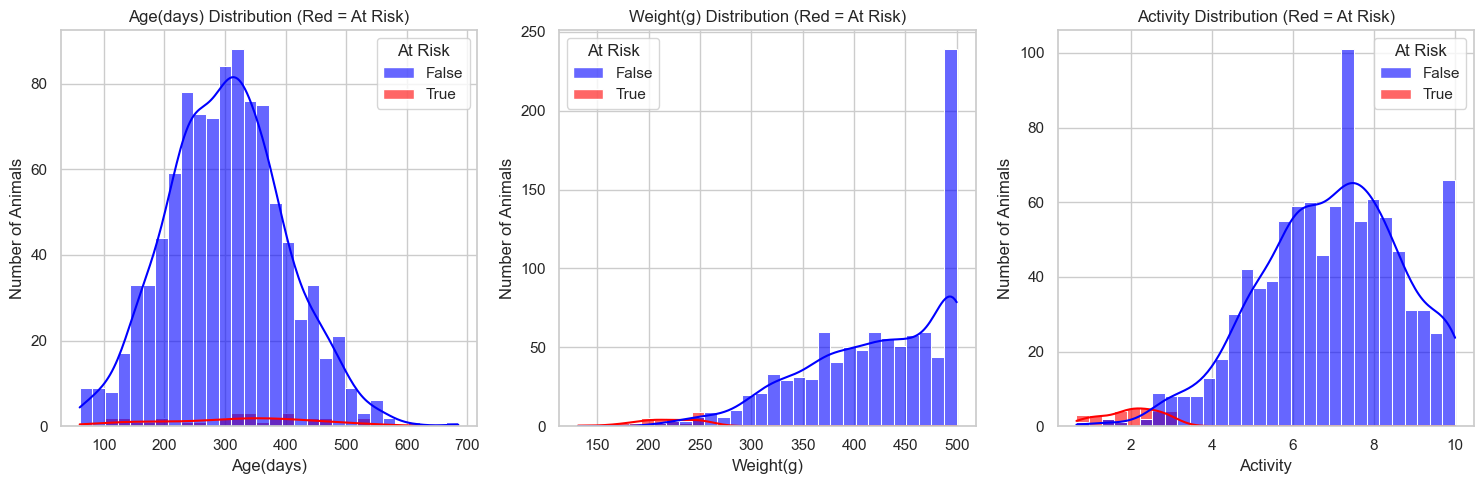

In [27]:
# ------------------------------
# Histograms: Age, Weight, Activity
# ------------------------------

features1 = ["Age(days)", "Weight(g)", "Activity"]

plt.figure(figsize=(15, 5))
for i, col in enumerate(features1, 1):
    plt.subplot(1, 3, i)
    sns.histplot(
        data,
        x=col,
        kde=True,               # Add smooth density curve
        bins=30,
        hue='At Risk',          # Color separation: red = at risk, blue = healthy
        palette={False:'blue', True:'red'},
        alpha=0.6
    )
    plt.title(f'{col} Distribution (Red = At Risk)')
    plt.ylabel("Number of Animals")

plt.tight_layout()
plt.show()

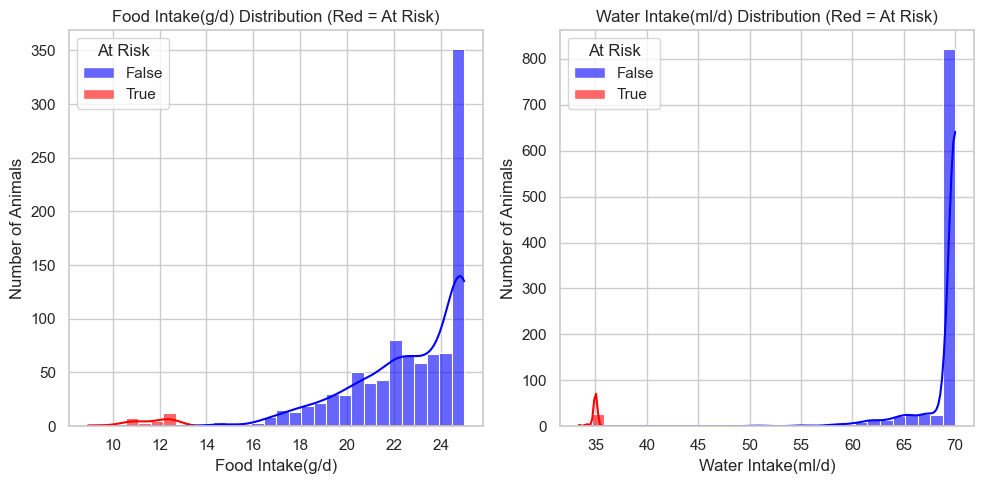

In [28]:
# ------------------------------
# Histograms: Food Intake & Water Intake
# ------------------------------

features2 = ["Food Intake(g/d)", "Water Intake(ml/d)"]

plt.figure(figsize=(10,5))
for i, col in enumerate(features2, 1):
    plt.subplot(1, 2, i)
    sns.histplot(
        data,
        x=col,
        kde=True,
        bins=30,
        hue="At Risk",
        palette={False:"blue", True:"red"},
        alpha=0.6
    )
    plt.title(f"{col} Distribution (Red = At Risk)")
    plt.ylabel("Number of Animals")

plt.tight_layout()
plt.show()


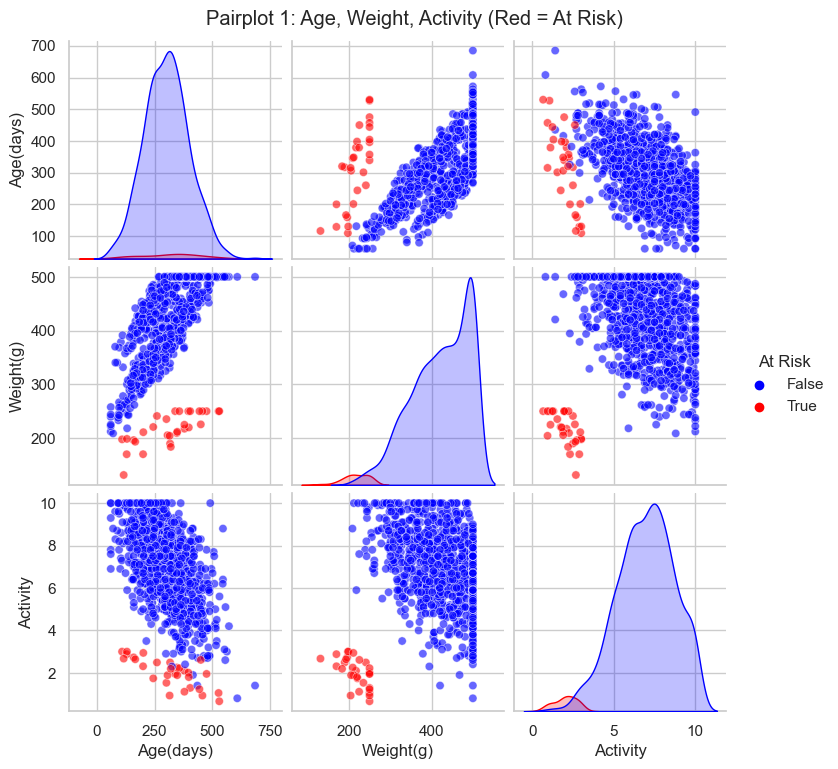

In [29]:
# ------------------------------
# Pairplot: Age, Weight, Activity
# ------------------------------

sns.pairplot(
    data,
    vars=['Age(days)', 'Weight(g)', 'Activity'],
    hue='At Risk',
    palette={False:'blue', True:'red'},
    diag_kind='kde',
    plot_kws={'alpha':0.6}
)
plt.suptitle('Pairplot 1: Age, Weight, Activity (Red = At Risk)', y=1.02)
plt.show()

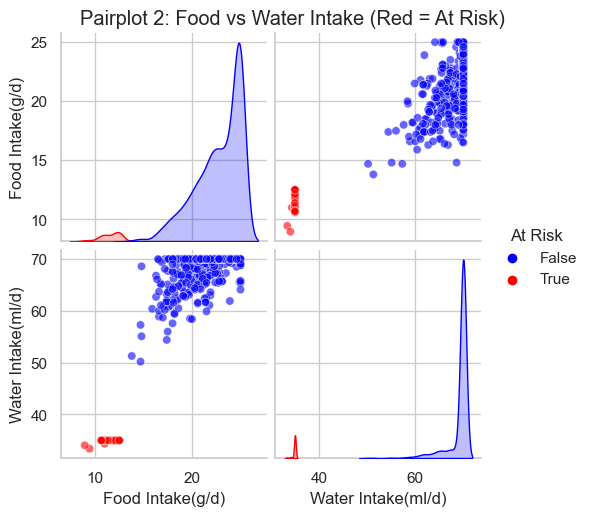

In [30]:
# ------------------------------
# Pairplot: Food Intake vs Water Intake
# ------------------------------

sns.pairplot(
    data,
    vars=["Food Intake(g/d)", "Water Intake(ml/d)"],
    hue="At Risk",
    palette={False:"blue", True:"red"},
    diag_kind="kde",
    plot_kws={"alpha":0.6}
)
plt.suptitle("Pairplot 2: Food vs Water Intake (Red = At Risk)", y=1.02)
plt.show()

## Phase 2 — Data Creation & Exploration  
### Step 3: Data Quality Checks  

Before moving forward with feature engineering or modeling, it is critical to ensure that the dataset is both biologically credible and statistically robust.  

#### Veterinary / Biological Rationale  
- In real-world research, laboratory datasets almost always contain **missing or incomplete records** (e.g., failed measurements, handling errors, or technical limitations).  
- Missing data can bias interpretation, especially if certain strains, sexes, or health conditions are disproportionately affected.  
- By simulating missingness and repairing it, we prepare the pipeline for realistic use cases where data integrity is not perfect.  

---

#### Machine Learning Rationale  
- Machine learning models cannot handle missing values directly. Without imputation, clustering and anomaly detection will fail.  
- The strategy depends on feature type:  
  - **Continuous variables** (e.g., weight, food intake) → imputed using the mean, ensuring preservation of global distributions.  
  - **Categorical variables** (e.g., strain, sex) → imputed using the mode (most common category), ensuring minimal distortion.  
- Visualization of missingness helps detect patterns (e.g., systematic missingness in certain features) that might indicate bias.  

---

In this step, we:  
1. Introduce artificial missing values (~5%) to mimic real-world datasets.  
2. Visualize the pattern of missingness across features.  
3. Perform simple imputations (mean for continuous, mode for categorical).  
4. Confirm the dataset is complete and ready for further exploration.  


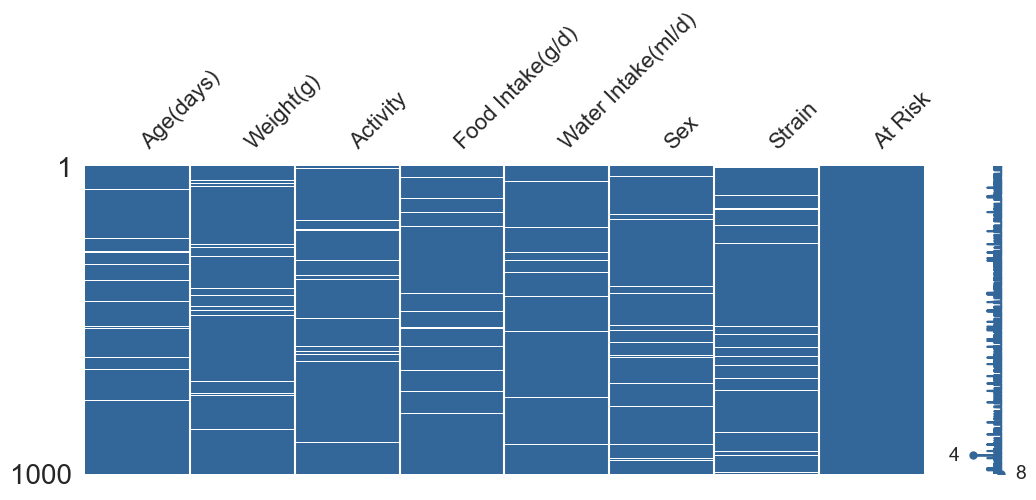

In [32]:
# ==============================
# Step 3.1 — Introduce Artificial Missing Values
# ==============================

data_missing = data.copy()
np.random.seed(42)  # For reproducibility

missing_pct = 0.05  # 5% missingness
for col in data_missing.columns:
    if col == "At Risk":  # Keep target column intact
        continue
    missing_indices = data_missing.sample(frac=missing_pct).index
    data_missing.loc[missing_indices, col] = np.nan

# ==============================
# Step 3.2 — Visualize Missing Data Matrix
# ==============================

msno.matrix(data_missing, figsize=(12, 4), color=(0.2, 0.4, 0.6))
plt.show()

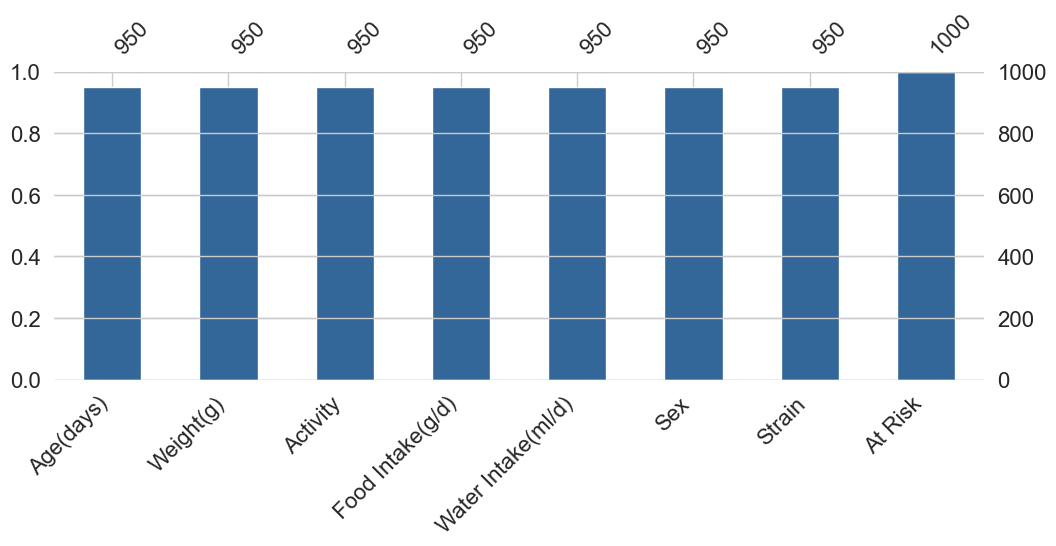

In [33]:
# ==============================
# Step 3.3 — Missing Data Bar Plot
# ==============================

msno.bar(data_missing, figsize=(12,4), color=(0.2,0.4,0.6))
plt.show()

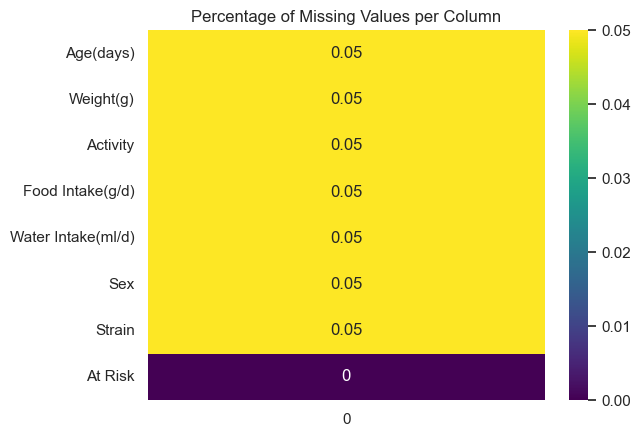

In [34]:
# ==============================
# Step 3.4 — Correlation Heatmap of Missingness
# ==============================

sns.heatmap(data_missing.isnull().mean().to_frame(), annot=True, cmap='viridis')
plt.title("Percentage of Missing Values per Column")
plt.show()

In [35]:
# ==============================
# Step 3.5 — Handle Missing Values (Imputation)
# ==============================

# Continuous variables
continuous_features = ["Age(days)", "Weight(g)", "Activity", "Food Intake(g/d)", "Water Intake(ml/d)"]
for col in continuous_features:
    data_missing[col].fillna(data_missing[col].mean(), inplace=True)

# Categorical variables
categorical_features = ["Sex", "Strain"]
for col in categorical_features:
    data_missing[col].fillna(data_missing[col].mode()[0], inplace=True)

# Verify no missing values remain
data_missing.isnull().sum()

Age(days)             0
Weight(g)             0
Activity              0
Food Intake(g/d)      0
Water Intake(ml/d)    0
Sex                   0
Strain                0
At Risk               0
dtype: int64

In [36]:
# Exploring the Most realistic version of the data
data_missing

Age(days)  Weight(g)  Activity  Food Intake(g/d)  Water Intake(ml/d)  \
0        350.0      500.0       6.4              25.0                70.0   
1        286.0      375.4       5.0              18.2                59.6   
2        365.0      491.9       5.0              22.0                69.4   
3        452.0      451.9       4.0              22.7                70.0   
4        277.0      490.0       7.5              25.0                70.0   
..         ...        ...       ...               ...                 ...   
995      272.0      383.8       7.5              25.0                69.1   
996      480.0      500.0       2.8              19.4                65.4   
997      364.0      399.9       5.2              22.8                70.0   
998      243.0      415.8       7.5              24.6                70.0   
999      357.0      500.0       6.3              21.5                70.0   

        Sex        Strain  At Risk  
0      Male    Long Evans    False  
1    Female    Long Evans    False  
2      Male   Fischer 344    False  
3    Female    Long Evans    False  
4      Male    Long Evans    False  
..      ...           ...      ...  
995  Female    Long Evans    False  
996    Male  Brown Norway    False  
997  Female    Long Evans    False  
998    Male  Brown Norway    False  
999    Male    Long Evans    False  

[1000 rows x 8 columns]

## Phase 2 — Data Creation & Exploration  
### Step 4: Exploratory Data Analysis (EDA)

In this step, we explore the dataset to understand feature distributions, group differences, and relationships between biological variables.  

Main goals:  
1. Compute descriptive statistics (mean, std, median per feature).  
2. Compare distributions across **strain** and **sex**.  
3. Identify feature relationships.  
4. Visualize results with **boxplots, violin plots, scatterplots, correlation heatmaps, and grouped barplots**.  

This helps us verify that the dataset looks biologically realistic before building prediction models.


In [38]:
# ==============================
# 1. Descriptive Statistics
# ==============================

print("=== Descriptive Statistics ===")

numeric_cols = ["Age(days)", "Weight(g)", "Activity", "Food Intake(g/d)", "Water Intake(ml/d)"]
desc_stats = data_missing[numeric_cols].describe().T
desc_stats['median'] = data_missing[numeric_cols].median()
desc_stats = desc_stats[['mean', 'std', 'median', 'min', '25%', '50%', '75%', 'max']]
print(desc_stats)

=== Descriptive Statistics ===
                          mean        std      median     min      25%  \
Age(days)           302.581053  95.898873  302.581053   60.00  240.000   
Weight(g)           414.962895  74.824101  422.650000  131.25  370.150   
Activity              6.848916   1.835581    6.900000    0.80    5.800   
Food Intake(g/d)     22.441789   2.908204   23.100000    8.95   21.275   
Water Intake(ml/d)   68.137368   6.082406   70.000000   33.40   69.675   

                           50%    75%    max  
Age(days)           302.581053  363.0  685.0  
Weight(g)           422.650000  481.4  500.0  
Activity              6.900000    8.1   10.0  
Food Intake(g/d)     23.100000   25.0   25.0  
Water Intake(ml/d)   70.000000   70.0   70.0  


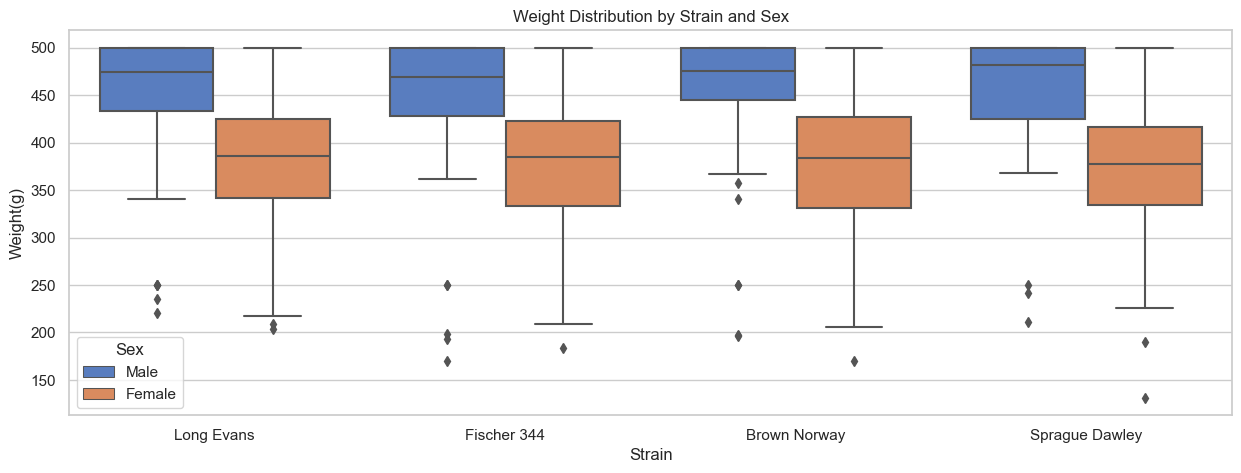

In [39]:
# ==============================
# 2. Boxplots by Strain and Sex
# ==============================

plt.figure(figsize=(15,5))
sns.boxplot(x='Strain', y='Weight(g)', hue='Sex', data=data_missing)
plt.title('Weight Distribution by Strain and Sex')
plt.show()

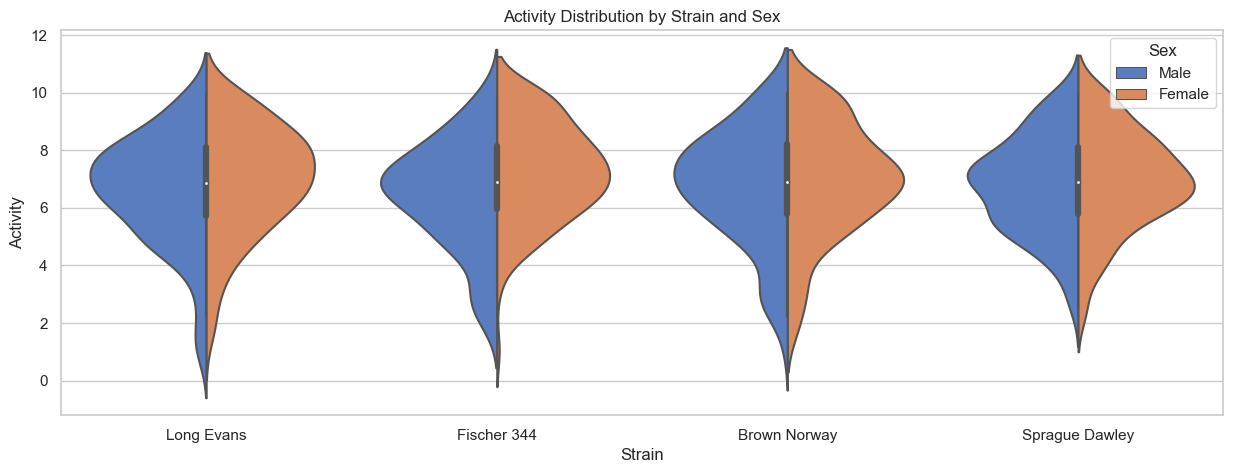

In [40]:
# ==============================
# Violin Plots by Strain and Sex
# ==============================

plt.figure(figsize=(15,5))
sns.violinplot(x='Strain', y='Activity', hue='Sex', data=data_missing, split=True)
plt.title('Activity Distribution by Strain and Sex')
plt.show()

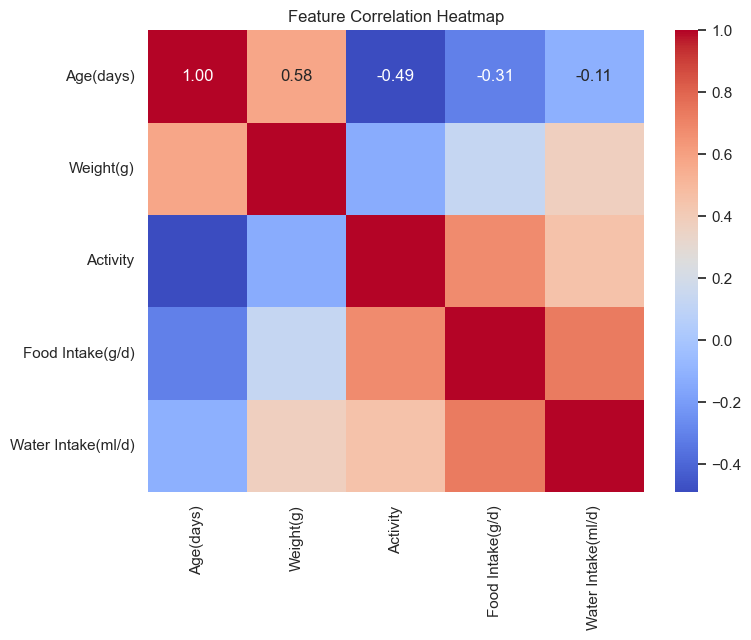

In [41]:
# ==============================
# 3. Feature Correlation Heatmap
# ==============================

plt.figure(figsize=(8,6))

# Compute correlation matrix for numeric features
corr = data_missing[numeric_cols].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

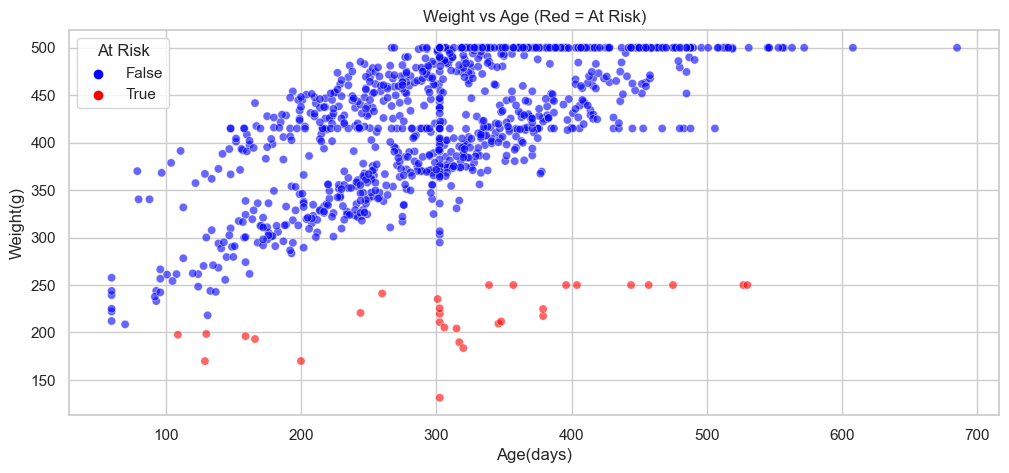

In [42]:
# ==============================
# Scatterplot: Weight vs Age
# ==============================

plt.figure(figsize=(12,5))
sns.scatterplot(
    x='Age(days)',
    y='Weight(g)',
    hue='At Risk',
    data=data_missing,
    alpha=0.6,
    palette={False:'blue', True:'red'}
)
plt.title('Weight vs Age (Red = At Risk)')
plt.show()

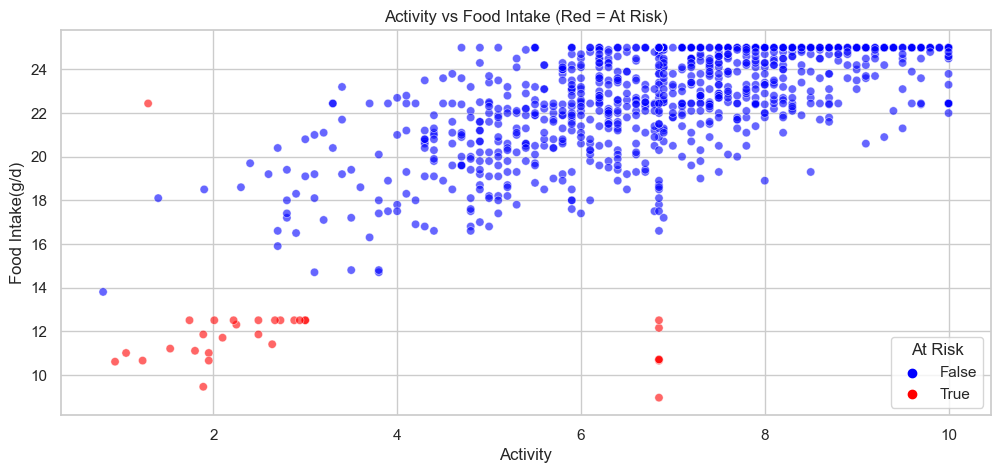

In [43]:
# ==============================
# Scatterplot: Activity vs Food Intake
# ==============================

plt.figure(figsize=(12,5))
sns.scatterplot(
    x='Activity', 
    y='Food Intake(g/d)', 
    hue='At Risk', 
    data=data_missing, 
    alpha=0.6, 
    palette={False:'blue', True:'red'}
)
plt.title('Activity vs Food Intake (Red = At Risk)')
plt.show()

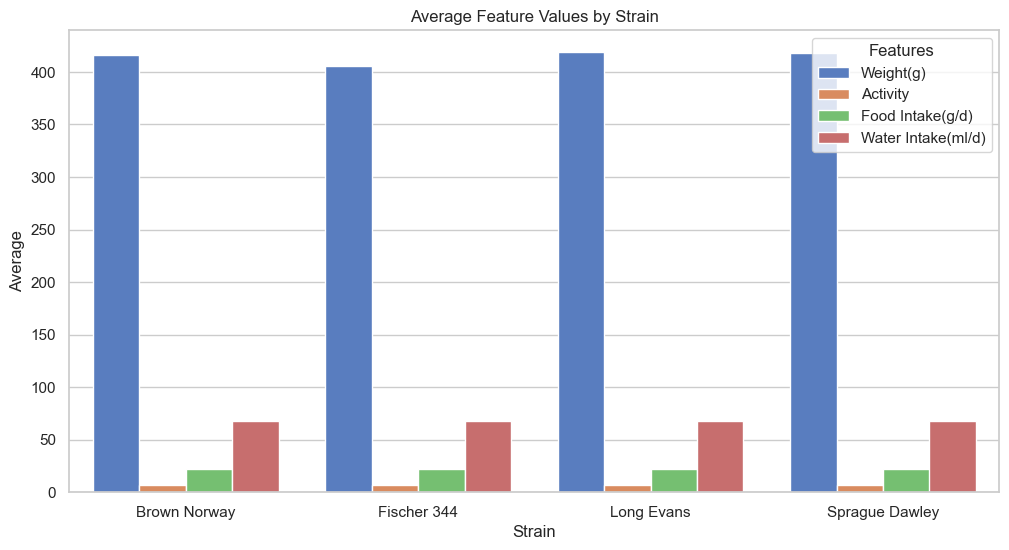

In [44]:
# ==============================
# 5. Grouped Barplots (Strain Averages)
# ==============================

barplot_cols = numeric_cols[1:]  # ['Weight(g)', 'Activity', 'Food Intake(g/d)', 'Water Intake(ml/d)']

strain_avg = data_missing.groupby('Strain')[barplot_cols].mean().reset_index()

strain_avg_melt = strain_avg.melt(id_vars='Strain', var_name='Features', value_name='Average')

plt.figure(figsize=(12,6))
sns.barplot(x='Strain', y='Average', hue='Features', data=strain_avg_melt)
plt.title('Average Feature Values by Strain')
plt.ylabel('Average')
plt.show()

## Phase 3: Feature Engineering
### Step 1: Feature Encoding

Before feeding data into unsupervised models, categorical features must be numerically encoded.  

**Biological / Veterinary Logic:**  
- Strain and sex are critical biological variables that influence weight, activity, and metabolism. Encoding them numerically allows the models to incorporate these differences into clustering and anomaly detection.  

---

**Machine Learning Logic:**  
- Label encoding converts categories into integers, maintaining simplicity for models like KMeans and Isolation Forest.  
- Preserves the categorical information without introducing artificial ordinal relationships in distance-based algorithms.


In [46]:
# ==============================
# Step 1: Feature Encoding
# ==============================

data_fe = data_missing.copy()

# Label encode categorical features
le_strain = LabelEncoder()
le_sex = LabelEncoder()

data_fe['Strain_enc'] = le_strain.fit_transform(data_fe['Strain'])
data_fe['Sex_enc'] = le_sex.fit_transform(data_fe['Sex'])

## Phase 3: Feature Engineering
### Step 2: Derived Features

Derived features transform raw measurements into biologically meaningful ratios or normalized metrics.

**Biological / Veterinary Rationale:**  
- **Weight/Age Ratio:** Indicates growth relative to age; helps identify underdeveloped or at-risk animals.  
- **Food/Weight Ratio:** Shows how much food each animal consumes relative to its body mass; low values can indicate poor nutrition or illness.  
- **Activity per Gram:** Normalizes activity by body weight, highlighting animals that are unusually lethargic for their size.  

---

**Machine Learning Rationale:**  
- Derived features enhance clustering and anomaly detection by emphasizing subtle physiological differences.  
- Ratios and normalized metrics reduce the effect of absolute values, making distance-based methods more sensitive to deviations from typical health patterns.  

---

**Visualization Goals:**  
- Examine distributions with histograms to ensure realistic ranges.  
- Compare across strains and sexes using boxplots to capture group-level differences.  
- Detect potential outliers that may correspond to biologically at-risk individuals.


In [48]:
# ==============================
# Step 2: Derived Features
# ==============================
data_fe['Weight_Age_Ratio'] = data_fe['Weight(g)'] / data_fe['Age(days)']
data_fe['Food_Weight_Ratio'] = data_fe['Food Intake(g/d)'] / data_fe['Weight(g)']
data_fe['Activity_per_g'] = data_fe['Activity'] / data_fe['Weight(g)']

data_fe

Age(days)  Weight(g)  Activity  Food Intake(g/d)  Water Intake(ml/d)  \
0        350.0      500.0       6.4              25.0                70.0   
1        286.0      375.4       5.0              18.2                59.6   
2        365.0      491.9       5.0              22.0                69.4   
3        452.0      451.9       4.0              22.7                70.0   
4        277.0      490.0       7.5              25.0                70.0   
..         ...        ...       ...               ...                 ...   
995      272.0      383.8       7.5              25.0                69.1   
996      480.0      500.0       2.8              19.4                65.4   
997      364.0      399.9       5.2              22.8                70.0   
998      243.0      415.8       7.5              24.6                70.0   
999      357.0      500.0       6.3              21.5                70.0   

        Sex        Strain  At Risk  Strain_enc  Sex_enc  Weight_Age_Ratio  \
0      Male    Long Evans    False           2        1          1.428571   
1    Female    Long Evans    False           2        0          1.312587   
2      Male   Fischer 344    False           1        1          1.347671   
3    Female    Long Evans    False           2        0          0.999779   
4      Male    Long Evans    False           2        1          1.768953   
..      ...           ...      ...         ...      ...               ...   
995  Female    Long Evans    False           2        0          1.411029   
996    Male  Brown Norway    False           0        1          1.041667   
997  Female    Long Evans    False           2        0          1.098626   
998    Male  Brown Norway    False           0        1          1.711111   
999    Male    Long Evans    False           2        1          1.400560   

     Food_Weight_Ratio  Activity_per_g  
0             0.050000        0.012800  
1             0.048482        0.013319  
2             0.044725        0.010165  
3             0.050232        0.008852  
4             0.051020        0.015306  
..                 ...             ...  
995           0.065138        0.019541  
996           0.038800        0.005600  
997           0.057014        0.013003  
998           0.059163        0.018038  
999           0.043000        0.012600  

[1000 rows x 13 columns]

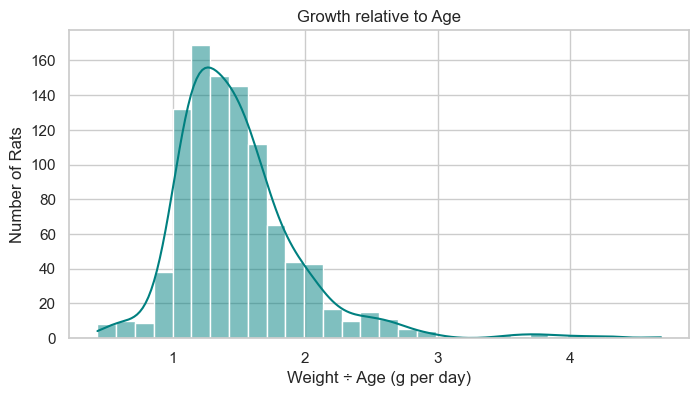

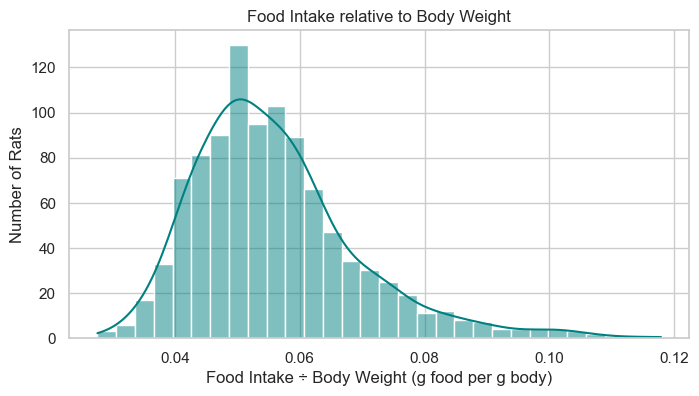

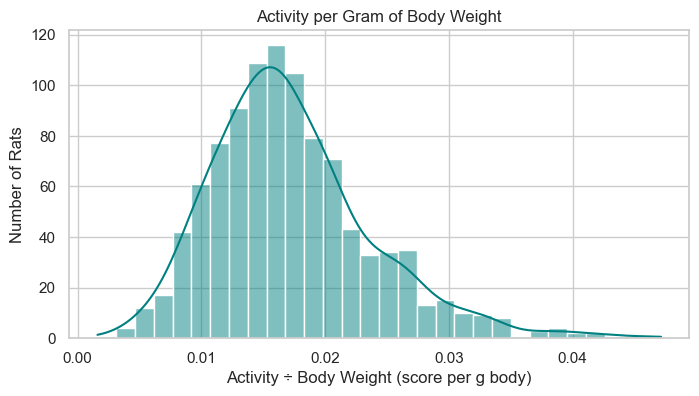

In [49]:
# ==============================
# Visualize distributions of derived features
# ==============================


title_map = {
    'Weight_Age_Ratio': 'Growth relative to Age',
    'Food_Weight_Ratio': 'Food Intake relative to Body Weight',
    'Activity_per_g': 'Activity per Gram of Body Weight'
}
x_map = {
    'Weight_Age_Ratio': 'Weight ÷ Age (g per day)',
    'Food_Weight_Ratio': 'Food Intake ÷ Body Weight (g food per g body)',
    'Activity_per_g': 'Activity ÷ Body Weight (score per g body)'
}

# visualize distributions
derived_features = ['Weight_Age_Ratio', 'Food_Weight_Ratio', 'Activity_per_g']
for col in derived_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data_fe[col], kde=True, bins=30, color='teal')
    plt.title(title_map[col])
    plt.xlabel(x_map[col])
    plt.ylabel("Number of Rats")
    plt.show()
    print('======================================================================================================================')

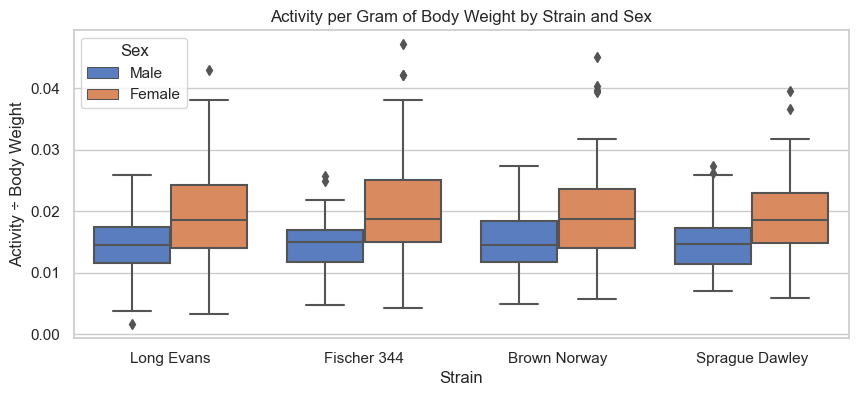

In [50]:
# ==============================
# Boxplot of Activity per Gram by Strain and Sex
# ==============================


plt.figure(figsize=(10,4))
sns.boxplot(x='Strain', y=col, hue='Sex', data=data_fe)
plt.title('Activity per Gram of Body Weight by Strain and Sex')
plt.ylabel('Activity ÷ Body Weight')
plt.show()

## Phase 4: Unsupervised Learning & Anomaly Detection

In this phase, the focus shifts from supervised prediction to uncovering latent structures and patterns in the dataset without relying on labeled outcomes.  

**Biological / Veterinary Rationale:**  
- Laboratory animals exhibit natural variability in physiological and behavioral metrics. Unsupervised methods help identify subpopulations or health profiles that may correspond to normal, borderline, or at-risk individuals.  
- Anomaly detection highlights animals whose measurements deviate significantly from typical patterns, enabling early detection of potential health issues.  
- Cluster interpretation provides insight into strain- or sex-specific trends and physiological norms, which can inform veterinary interventions.

---

**Machine Learning Rationale:**  
- Scaling numeric features ensures that distance-based methods (e.g., KMeans, DBSCAN) treat all measurements fairly.  
- Dimensionality reduction techniques such as PCA or UMAP simplify high-dimensional data for visualization and help detect structure or anomalies.  
- Clustering algorithms reveal intrinsic groupings in the data, while anomaly detection methods quantify deviations from normal patterns.  
- The combination of clustering and anomaly scoring enables the derivation of a continuous health score, which can then be categorized into Low, Medium, or High risk.  

---

**Outcome:**  
- A biologically informed, data-driven mapping of animals to health profiles.  
- Identification of outliers and early warning signs for veterinary monitoring.  
- Enhanced interpretability through feature-level insights and visualizations.

---

### Step 1: Feature Scaling

Scaling and normalizing features is a critical preprocessing step before applying distance-based clustering or anomaly detection algorithms.

**Biological / Veterinary Rationale:**  
- Features have different ranges and units (e.g., age in days, weight in grams, activity score 0–10). Scaling ensures that no single feature dominates the clustering due to its numeric magnitude.  
- Some features have non-linear biological relationships with health:  
  - **Age:** Younger animals are typically healthier → scale inversely.  
  - **Weight:** Animals in a mid-range are healthiest → Gaussian-like scaling captures deviation from optimal body mass.  
  - **Activity, Food, Water intake:** Higher values generally indicate better health → normalize to 0–1 range.  

---

**Machine Learning Rationale:**  
- Scaling ensures fair contribution of each feature in distance calculations for clustering (KMeans, DBSCAN) and anomaly detection (Isolation Forest).  
- Normalization improves interpretability and stabilizes algorithms that are sensitive to feature magnitude.  

---

**Outcome:**  
- A scaled dataset where numeric features reflect biologically meaningful gradients of health.  
- Ready for dimensionality reduction, clustering, and anomaly detection.


In [53]:
# ==============================
# Phase 4 — Step 1: Feature Scaling
# ==============================


# Copy data
data_scaled = data_fe.copy()

# Age: younger = healthier (inverse scaling)
# Explanation: scales all ages to 0–1, then flips so younger rats = higher "health score"
data_scaled['Age_scaled'] = 1 - MinMaxScaler().fit_transform(data_scaled[['Age(days)']])

# Weight: mid-range healthiest → Gaussian-like scaling
# Explanation: animals near the mean weight get higher score (~1), extremes get lower (~0)
weight_mean = data_scaled['Weight(g)'].mean()
weight_std = data_scaled['Weight(g)'].std()
data_scaled['Weight_scaled'] = np.exp(-((data_scaled['Weight(g)'] - weight_mean)**2)/(2*(weight_std**2)))

# Activity, Food, Water → higher is healthier
# Explanation: simple 0–1 scaling so the most active / best-fed animals score highest
for col in ['Activity', 'Food Intake(g/d)', 'Water Intake(ml/d)']:
    data_scaled[col + '_scaled'] = MinMaxScaler().fit_transform(data_scaled[[col]])

# Keep categorical encodings (strain and sex)
data_scaled['Strain_enc'] = data_fe['Strain_enc']
data_scaled['Sex_enc'] = data_fe['Sex_enc']

# List of scaled numeric features
scaled_features = ['Age_scaled', 'Weight_scaled', 'Activity_scaled', 
                   'Food Intake(g/d)_scaled', 'Water Intake(ml/d)_scaled']

# Final scaled dataset ready for unsupervised learning
data_scaled_scaled = data_scaled[scaled_features + ['Strain_enc','Sex_enc','At Risk']]
data_scaled_scaled.head()

Age_scaled  Weight_scaled  Activity_scaled  Food Intake(g/d)_scaled  \
0      0.5360       0.524238         0.608696                 1.000000   
1      0.6384       0.869544         0.456522                 0.576324   
2      0.5120       0.589407         0.456522                 0.813084   
3      0.3728       0.885284         0.347826                 0.856698   
4      0.6528       0.604804         0.728261                 1.000000   

   Water Intake(ml/d)_scaled  Strain_enc  Sex_enc  At Risk  
0                   1.000000           2        1    False  
1                   0.715847           2        0    False  
2                   0.983607           1        1    False  
3                   1.000000           2        0    False  
4                   1.000000           2        1    False

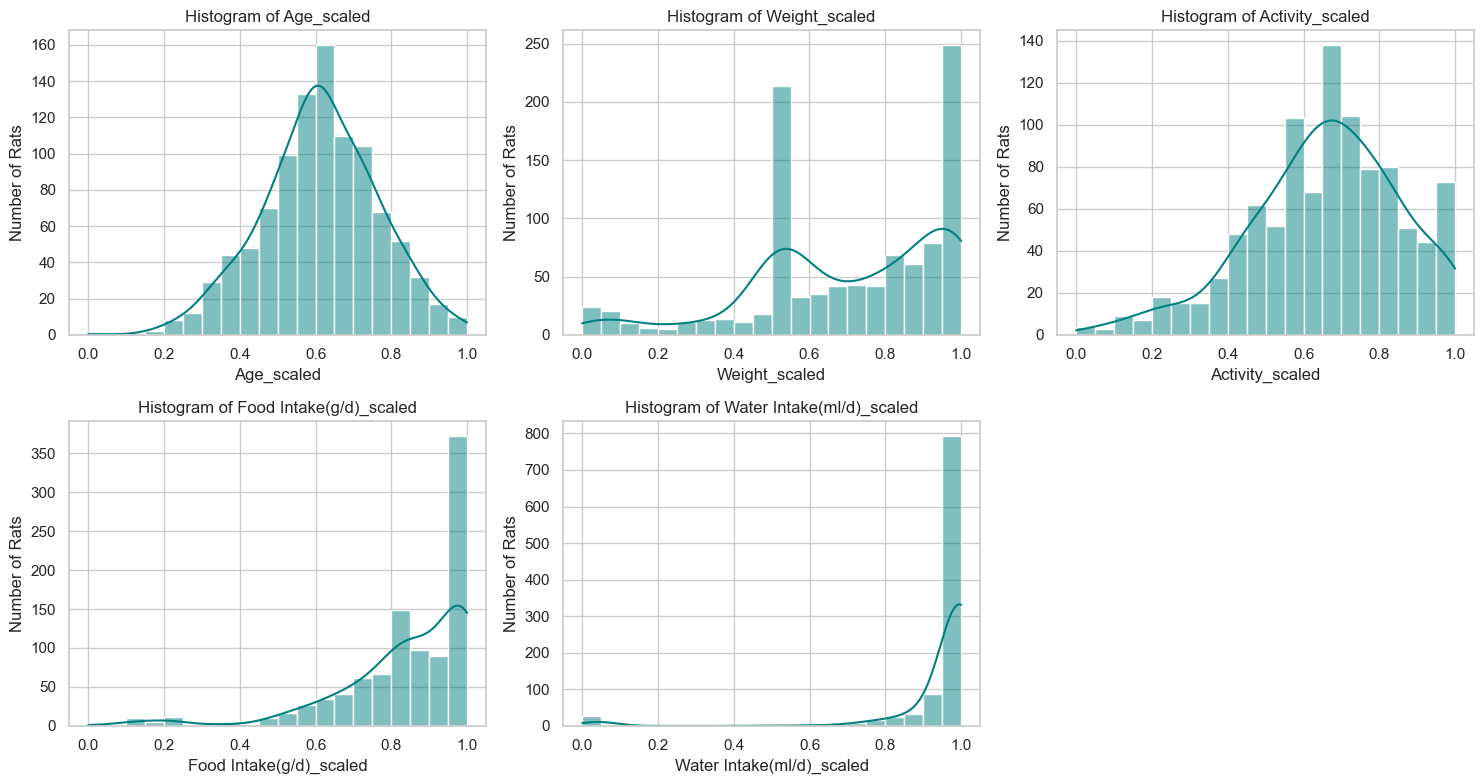

In [54]:
# ==============================
# Visualizing Scaled Features
# ==============================

plt.figure(figsize=(15,8))
for i, col in enumerate(scaled_features):
    plt.subplot(2,3,i+1)
    sns.histplot(
        data_scaled_scaled[col], 
        kde=True, 
        bins=20, 
        kde_kws={'bw_adjust':1.2}, 
        color='teal'
    )
    plt.title(f'Histogram of {col}')
    plt.ylabel('Number of Rats')
    # Interpret for vets/researchers:
    # - Look for values near 1 → healthier animals
    # - Values near 0 → animals that might be at risk
plt.tight_layout()
plt.show()

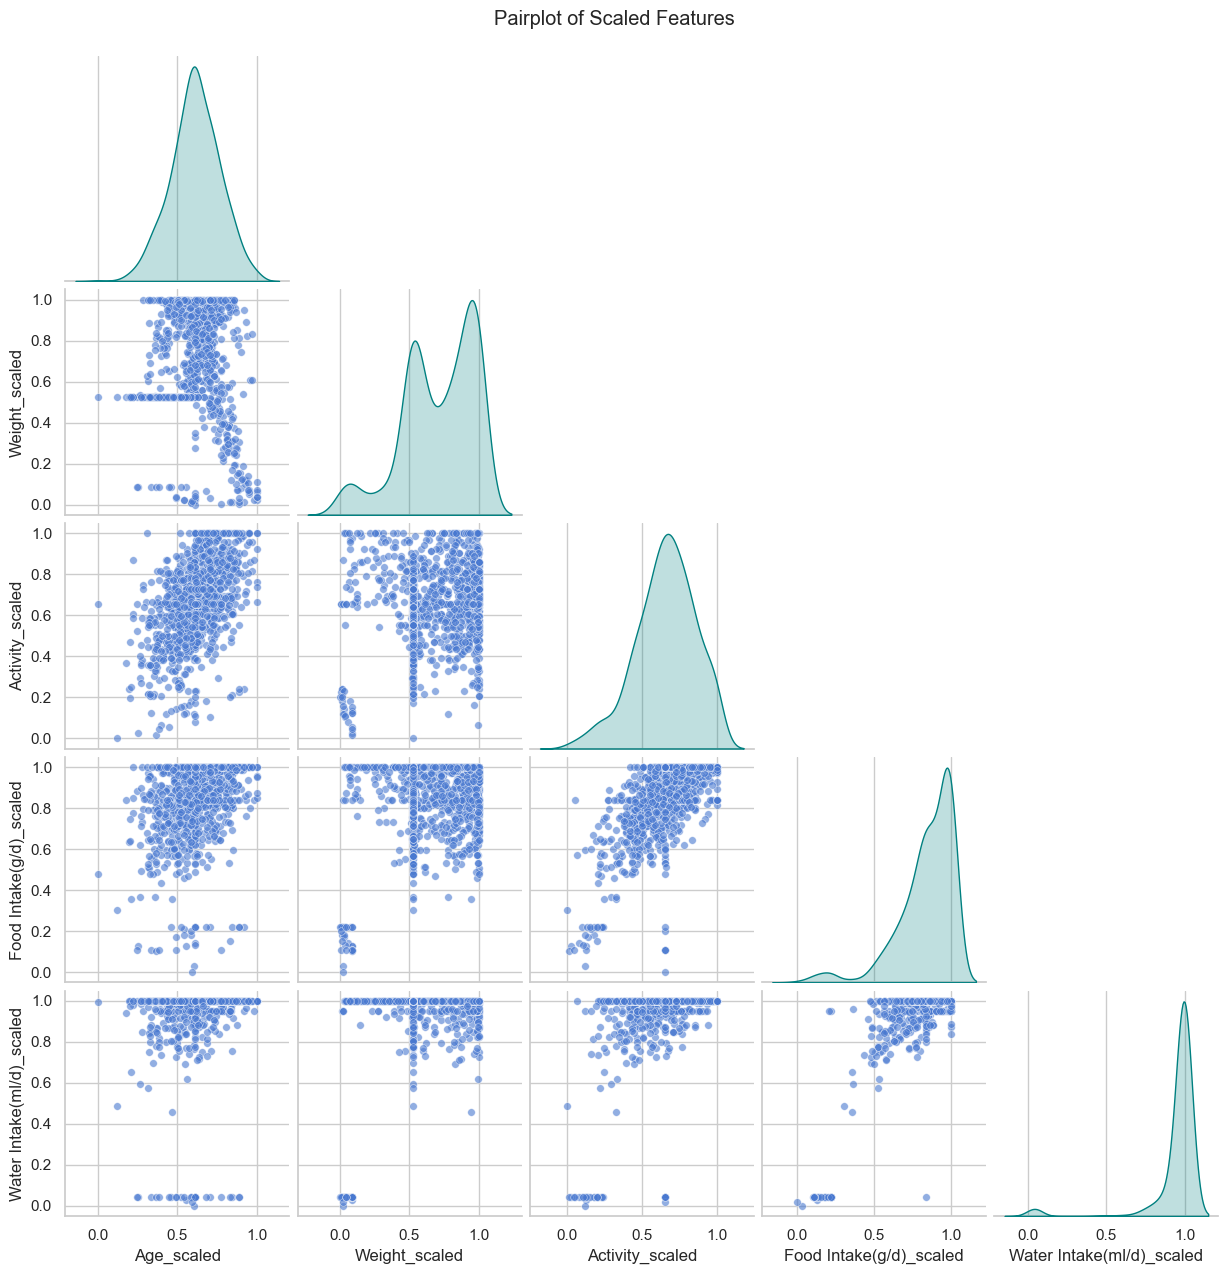

In [55]:
# Pairplot to visualize relationships between scaled features

sns.pairplot(data_scaled_scaled[scaled_features], corner=True, diag_kind='kde', plot_kws={'alpha':0.6, 's':30}, diag_kws={'bw_adjust':1.2, 'color':'teal'})
plt.suptitle('Pairplot of Scaled Features', y=1.02)
plt.show()

## Phase 4: Unsupervised Learning & Anomaly Detection
### Step 2: Dimensionality Reduction for Visualization

Dimensionality reduction transforms high-dimensional health metrics into 2D or 3D representations to visualize latent structures, clusters, and anomalies.

**Biological / Veterinary Rationale:**  
- Visualizing scaled features allows identification of natural groupings of animals with similar health profiles.  
- PCA highlights the major axes of variance in health indicators, helping to detect strain-specific or sex-specific trends.  
- UMAP preserves local neighborhoods, revealing subtle patterns and potentially at-risk subgroups.  
- Veterinarians can interpret clusters as biologically meaningful cohorts: healthy, intermediate, or at-risk animals.  

---

**Machine Learning Rationale:**  
- Reduces dimensionality for clustering algorithms while preserving key variance and local relationships.  
- Scree plots from PCA help select the number of principal components capturing most of the data’s variance.  
- 2D/3D projections (PCA, UMAP) facilitate visual assessment of cluster separation, anomalies, and feature interactions.  

---

**Outcome:**  
- Clear visualizations of the underlying structure of the scaled dataset.  
- Provides insights into how strain, sex, and other features contribute to health patterns and outliers.


In [57]:
# ==============================
# Phase 4 — Step 2: Dimensionality Reduction (PCA + UMAP)
# ==============================

# -----------------------------
# Make a clean copy of the DataFrame
# -----------------------------
data_scaled_scaled = data_scaled_scaled.copy()

# -----------------------------
# Numeric + categorical features
# -----------------------------
X_numeric = data_scaled_scaled[scaled_features].values
X_cat = data_scaled_scaled[['Strain_enc','Sex_enc']].values


# Combine numeric + categorical for PCA/UMAP
X = np.hstack([X_numeric, X_cat])

# -----------------------------
# Impute missing values if any
# -----------------------------
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# -----------------------------
# PCA → 2D
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Assign PCA results safely
data_scaled_scaled.loc[:, 'PCA1'] = X_pca[:,0]
data_scaled_scaled.loc[:, 'PCA2'] = X_pca[:,1]

print("PCA explained variance ratio:", pca.explained_variance_ratio_)

# -----------------------------
# UMAP → 2D
# -----------------------------
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42, n_jobs=1)
X_umap = reducer.fit_transform(X_imputed)

# Assign UMAP results safely
data_scaled_scaled.loc[:, 'UMAP1'] = X_umap[:,0]
data_scaled_scaled.loc[:, 'UMAP2'] = X_umap[:,1]

# -----------------------------
# Final DataFrame ready
# -----------------------------
data_scaled_scaled.head()


PCA explained variance ratio: [0.72803238 0.15435881]


Age_scaled  Weight_scaled  Activity_scaled  Food Intake(g/d)_scaled  \
0      0.5360       0.524238         0.608696                 1.000000   
1      0.6384       0.869544         0.456522                 0.576324   
2      0.5120       0.589407         0.456522                 0.813084   
3      0.3728       0.885284         0.347826                 0.856698   
4      0.6528       0.604804         0.728261                 1.000000   

   Water Intake(ml/d)_scaled  Strain_enc  Sex_enc  At Risk      PCA1  \
0                   1.000000           2        1    False -0.459524   
1                   0.715847           2        0    False -0.444112   
2                   0.983607           1        1    False  0.539164   
3                   1.000000           2        0    False -0.445372   
4                   1.000000           2        1    False -0.459314   

       PCA2     UMAP1      UMAP2  
0  0.530546 -4.874221   3.450252  
1 -0.446215  8.396434  19.566402  
2  0.562940  8.325603   2.409029  
3 -0.450063  8.443115  19.454447  
4  0.518728 -5.218773   3.457318

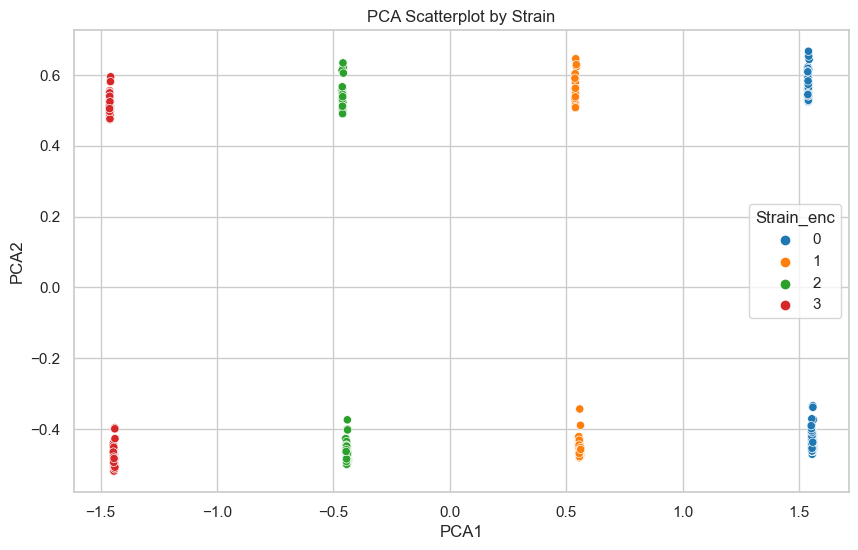

In [58]:
# PCA scatterplot colored by strain

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Strain_enc', data=data_scaled_scaled, palette='tab10')
plt.title('PCA Scatterplot by Strain')
plt.show()

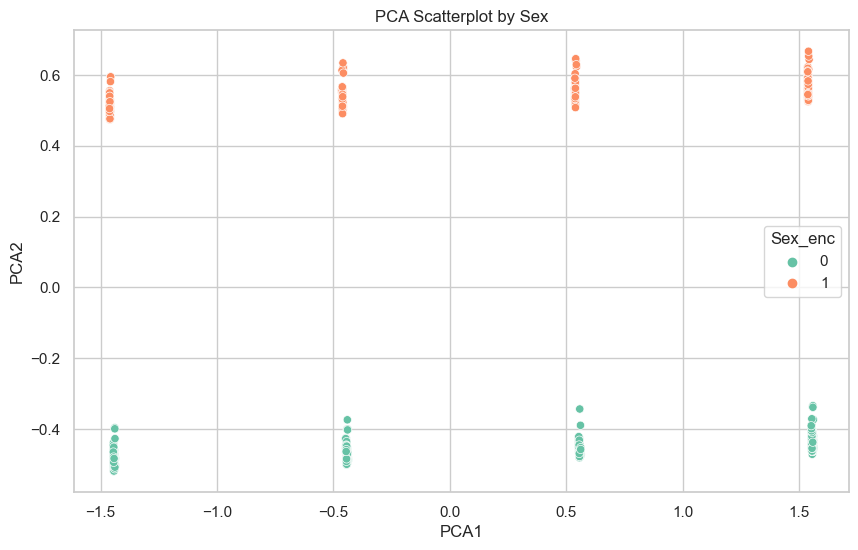

In [59]:
# PCA scatterplot colored by sex

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Sex_enc', data=data_scaled_scaled, palette='Set2')
plt.title('PCA Scatterplot by Sex')
plt.show()

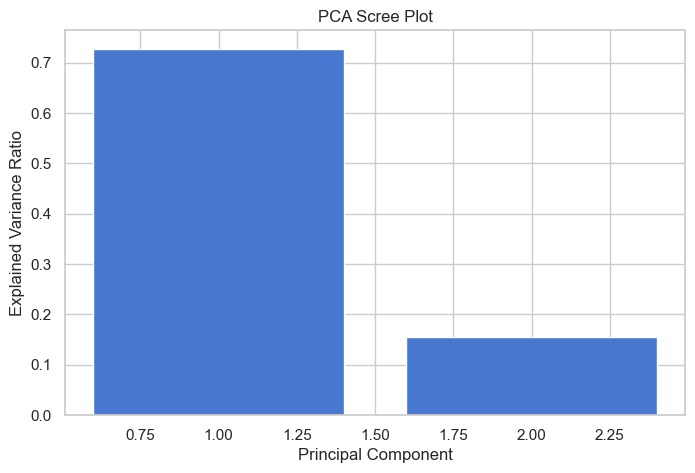

In [60]:
# Scree plot for explained variance

plt.figure(figsize=(8,5))
plt.bar(range(1,3), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.show()

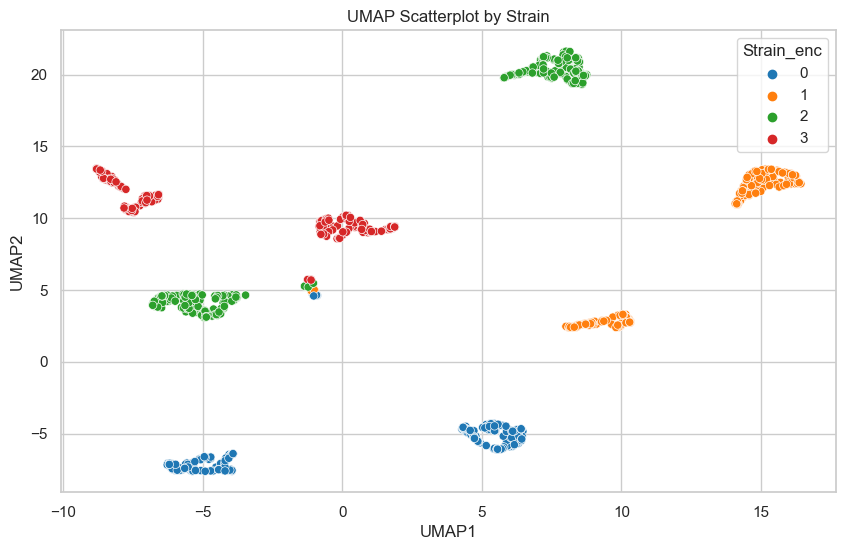

In [61]:
# UMAP scatterplot colored by strain

plt.figure(figsize=(10,6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Strain_enc', data=data_scaled_scaled, palette='tab10')
plt.title('UMAP Scatterplot by Strain')
plt.show()

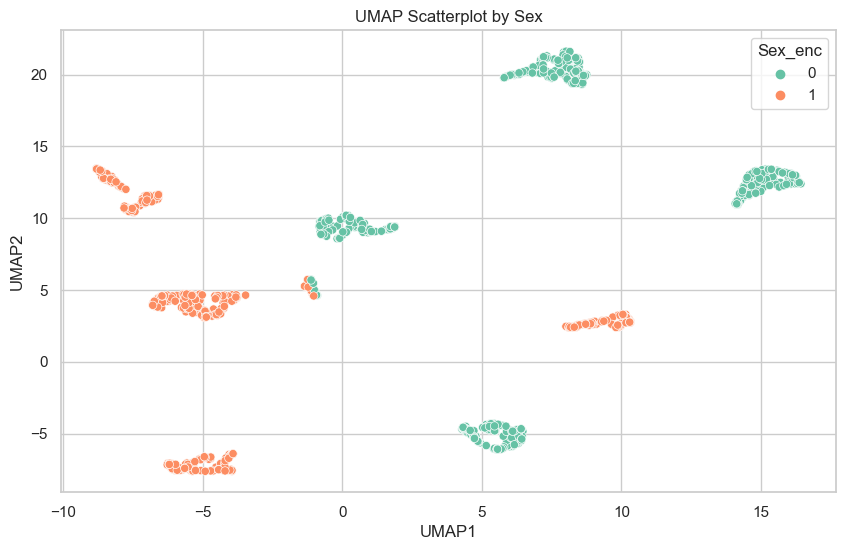

In [62]:
# UMAP scatterplot colored by sex

plt.figure(figsize=(10,6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Sex_enc', data=data_scaled_scaled, palette='Set2')
plt.title('UMAP Scatterplot by Sex')
plt.show()

> ### Note on PCA & UMAP Visualizations
>
> PCA and UMAP reduce high-dimensional data to 2D to help visualize overall structure.  
> - **Main purpose:** detect outliers, explore potential clusters, and provide context for clustering or anomaly detection.  
> - **Caution:** axes are abstract; separation by strain or sex is indicative of patterns, **not direct biological meaning**.  
>
> These plots are primarily a tool for **quality control and methodological rigor**, not for interpreting individual animal health outcomes.


## Phase 4: Unsupervised Learning & Anomaly Detection
### Step 3: Clustering to Identify Health Profiles

Clustering groups animals based on latent patterns in their scaled health features, allowing identification of biologically meaningful cohorts.

**Biological / Veterinary Rationale:**  
- Reveals natural groupings of animals with similar health profiles (e.g., healthy, intermediate, at-risk).  
- Cluster centroids summarize average feature values, helping veterinarians understand which traits define each health profile.  
- Radar plots and boxplots per cluster allow visual inspection of multi-feature distributions and highlight deviations from normal patterns.  

---

**Machine Learning Rationale:**  
- Distance-based clustering (KMeans) separates animals into distinct clusters in scaled feature space.  
- Silhouette score and elbow method guide the selection of optimal cluster number.  
- PCA and UMAP scatterplots visualize clusters in reduced dimensions for intuitive interpretation.  

---

**Outcome:**  
- Identification of clusters representing different health states.  
- Quantitative and visual summaries of feature distributions per cluster to inform anomaly detection and health scoring.


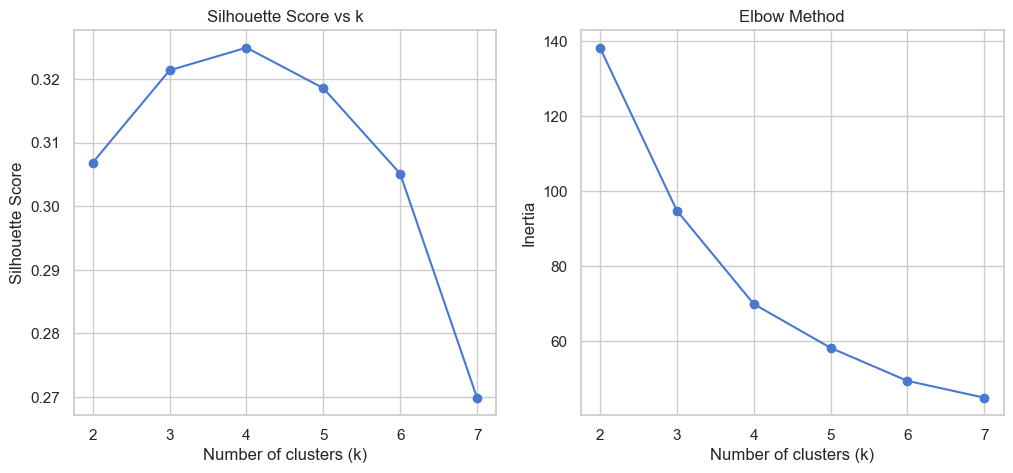

Best number of clusters based on silhouette score: 4


In [65]:
# ==============================
# Step 3a: Determine Optimal Number of Clusters
# ==============================

# Features for clustering
X_cluster = data_scaled_scaled[scaled_features].values


# Impute missing values (mean strategy)
imputer = SimpleImputer(strategy='mean')
X_cluster_imputed = imputer.fit_transform(X_cluster)

# Try k = 2 to 7
sil_scores = []
inertia = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster_imputed)
    sil_scores.append(silhouette_score(X_cluster_imputed, labels))
    inertia.append(kmeans.inertia_)

# Plot Silhouette Score and Elbow (Inertia)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,8), sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

plt.subplot(1,2,2)
plt.plot(range(2,8), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Choose best k based on max silhouette
best_k = range(2,8)[sil_scores.index(max(sil_scores))]
print("Best number of clusters based on silhouette score:", best_k)

In [66]:
# Step 3b: Fit KMeans with best k
# -------------------------------

data_scaled_scaled = data_scaled_scaled.copy()
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
data_scaled_scaled['Cluster'] = kmeans_final.fit_predict(X_cluster_imputed)

# Cluster centroids for interpretation
centroids = pd.DataFrame(kmeans_final.cluster_centers_, columns=scaled_features)
centroids['Cluster'] = centroids.index
centroids

Age_scaled  Weight_scaled  Activity_scaled  Food Intake(g/d)_scaled  \
0    0.483285       0.685082         0.465186                 0.712204   
1    0.687103       0.458241         0.771526                 0.924337   
2    0.571854       0.058502         0.237600                 0.189311   
3    0.650916       0.912018         0.740528                 0.917891   

   Water Intake(ml/d)_scaled  Cluster  
0                   0.939643        0  
1                   0.989783        1  
2                   0.113674        2  
3                   0.990294        3

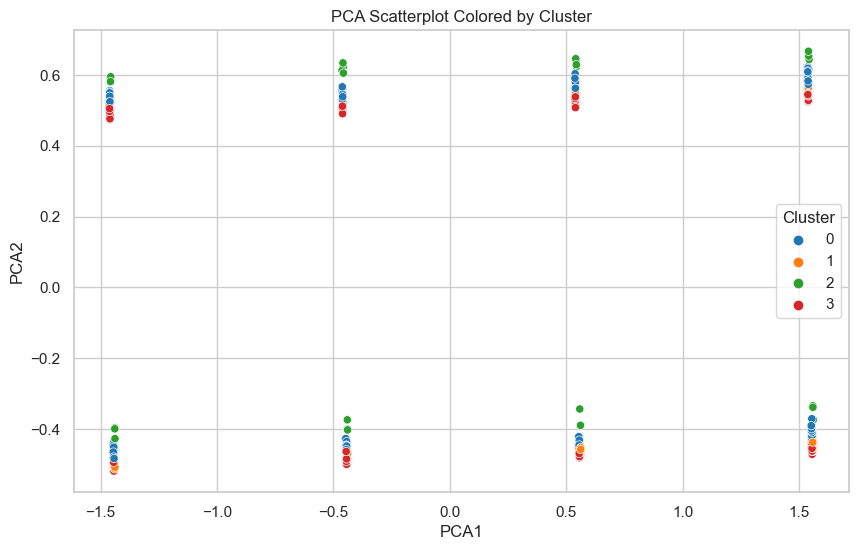

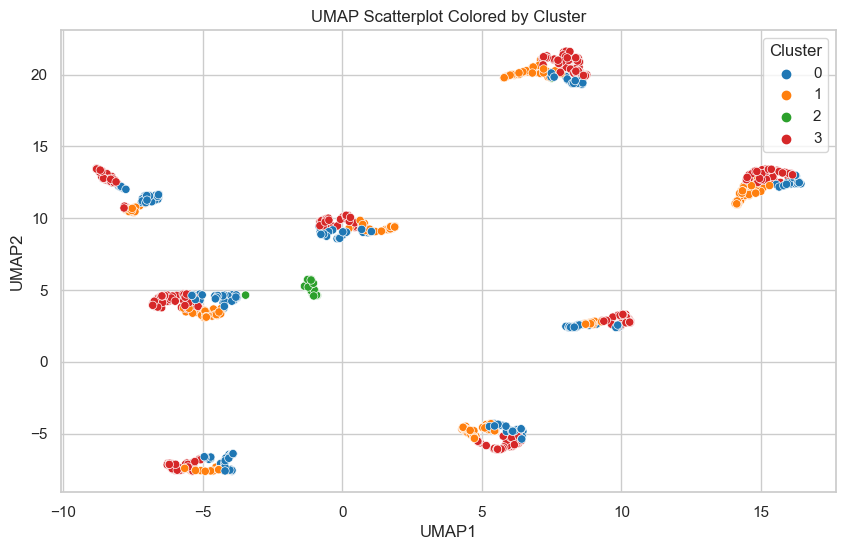

In [67]:
# ==============================
# Step 3c: Scatterplots colored by Cluster
# ==============================

# PCA scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_scaled_scaled, palette='tab10')
plt.title('PCA Scatterplot Colored by Cluster')
plt.show()
print('\n' + '='*130 + '\n')

# UMAP scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=data_scaled_scaled, palette='tab10')
plt.title('UMAP Scatterplot Colored by Cluster')
plt.show()

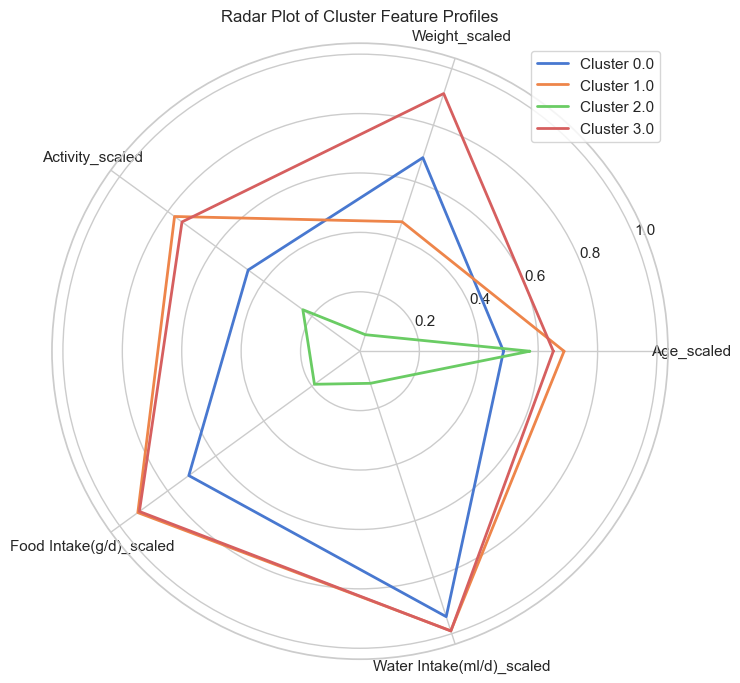

In [68]:
# ==============================
# Step 3d: Radar/Spider Plot per Cluster
# ==============================

categories = scaled_features
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

plt.figure(figsize=(8,8))
for i, row in centroids.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f"Cluster {row['Cluster']}", linewidth=2)

plt.xticks(angles[:-1], categories)
plt.title("Radar Plot of Cluster Feature Profiles")
plt.legend()
plt.show()

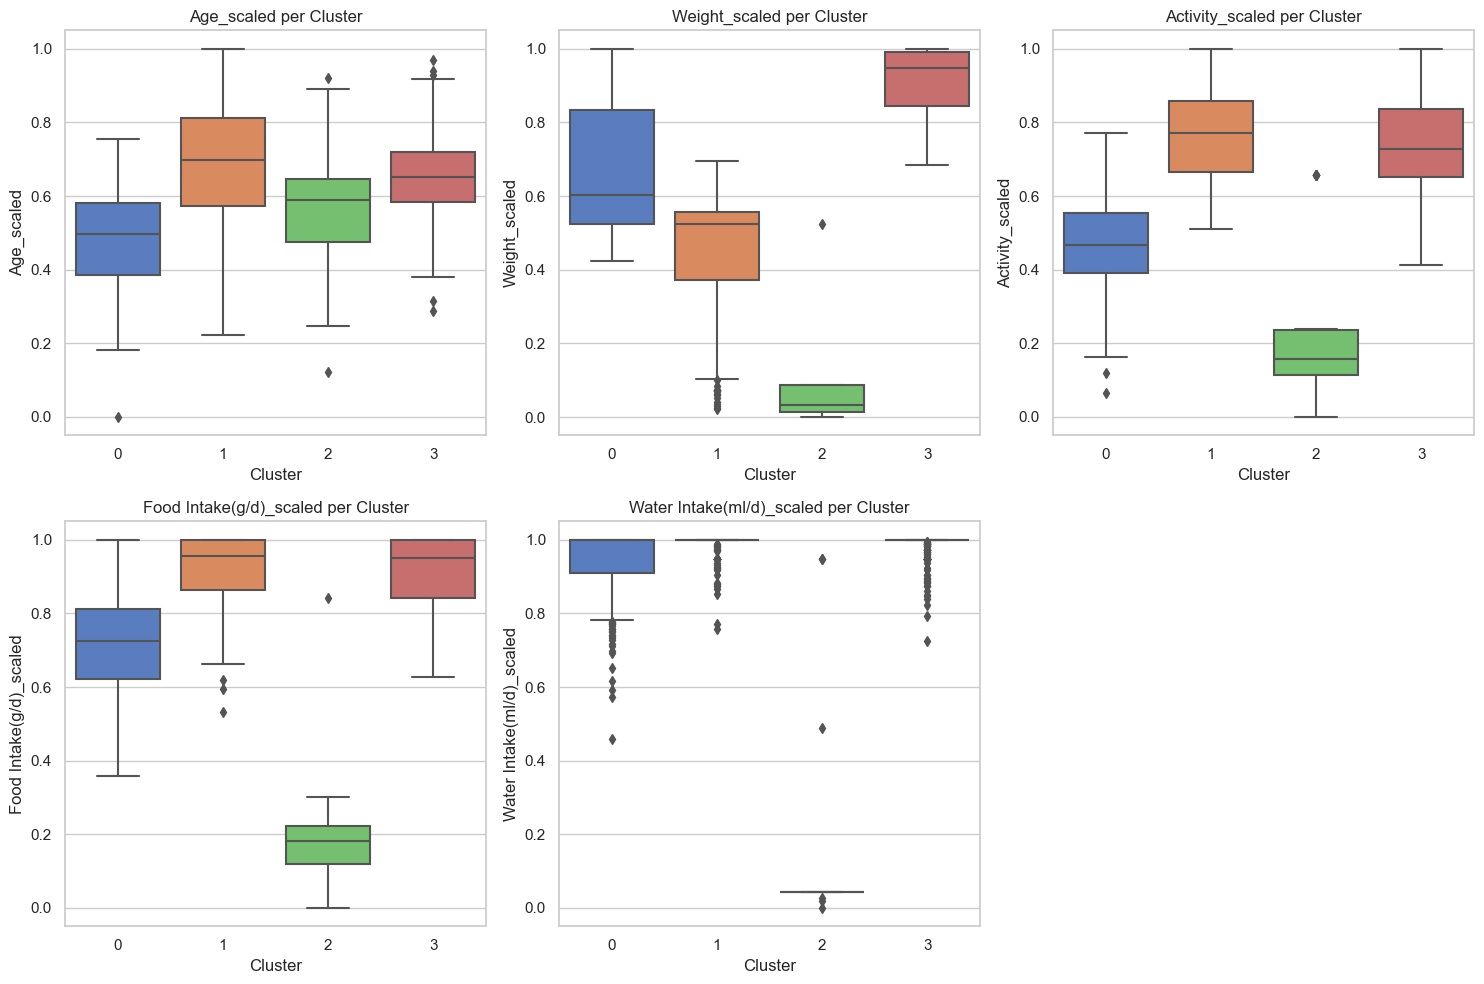

In [69]:
# ==============================
# Step 3e: Boxplots per Cluster
# ==============================

plt.figure(figsize=(15,10))
for i, col in enumerate(scaled_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='Cluster', y=col, data=data_scaled_scaled)
    plt.title(f'{col} per Cluster')
plt.tight_layout()
plt.show()

## Phase 4: Unsupervised Learning & Anomaly Detection
## Step 4 — Anomaly Detection with Isolation Forest  

### Biological / Veterinary Rationale  
The objective of this step is to identify individuals that deviate substantially from expected population health patterns based on integrated features (age, weight, activity, food intake, and water intake). Such deviations may correspond to:  

- Early indicators of disease or declining health  
- Outliers representing unusually robust animals, which may bias study outcomes  
- Technical or measurement artifacts, such as faulty sensors or data entry errors  

Systematic identification of these cases enables targeted veterinary review, early intervention, and improved data quality control.  

---

### Machine Learning Rationale  
The **Isolation Forest algorithm** is employed as an unsupervised anomaly detection method. It is particularly well-suited for this application due to the following properties:  

- Distribution-agnostic: no assumptions about normality of biological features  
- Robust to irrelevant or noisy variables  
- Computationally efficient and scalable to large populations  

The model produces an anomaly score for each individual, which is then integrated into the composite Health Score framework to refine risk categorization.  

---

### Planned Visualizations  
1. PCA scatterplot with anomalies highlighted  
2. UMAP scatterplot with anomalies highlighted  
3. Parallel coordinates plot illustrating feature contributions to anomalies  


In [71]:
# ==============================
# Step 4a: Isolation Forest Anomaly Detection (Fixed for NaNs)
# ==============================

# Make a copy to avoid SettingWithCopyWarning
data_scaled_scaled = data_scaled_scaled.copy()

# Features for anomaly detection
X_anomaly = data_scaled_scaled[scaled_features].values

# Impute missing values (mean strategy)
imputer = SimpleImputer(strategy='mean')
X_anomaly_imputed = imputer.fit_transform(X_anomaly)


# Fit Isolation Forest
iso = IsolationForest(contamination=0.03, random_state=42)  # ~3% anomalies
data_scaled_scaled.loc[:, 'Anomaly'] = iso.fit_predict(X_anomaly_imputed)  # -1 = anomaly, 1 = normal

# Convert to health-positive scale: 1 = normal/healthy, 0 = anomaly/at-risk
data_scaled_scaled.loc[:, 'Anomaly_Health'] = (data_scaled_scaled['Anomaly'] == 1).astype(int)

# Check counts
print(data_scaled_scaled['Anomaly'].value_counts())
print(data_scaled_scaled['Anomaly_Health'].value_counts())

Anomaly
 1    970
-1     30
Name: count, dtype: int64
Anomaly_Health
1    970
0     30
Name: count, dtype: int64


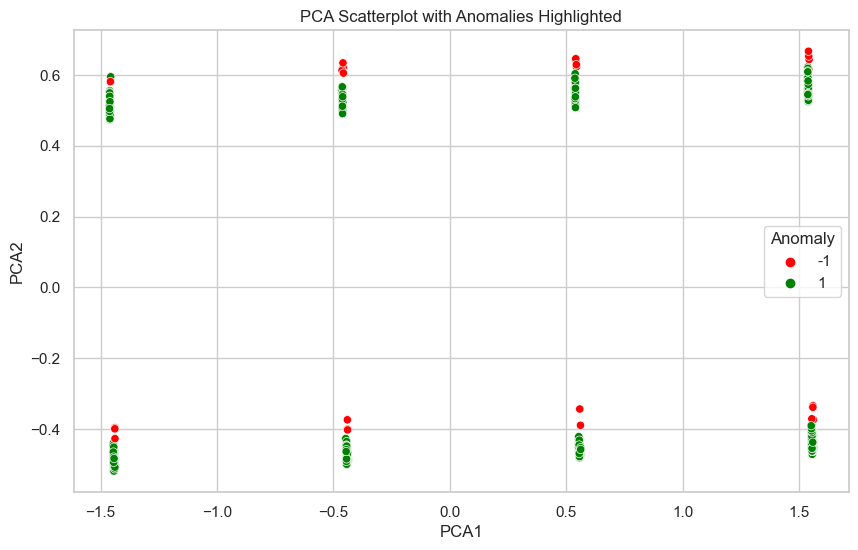

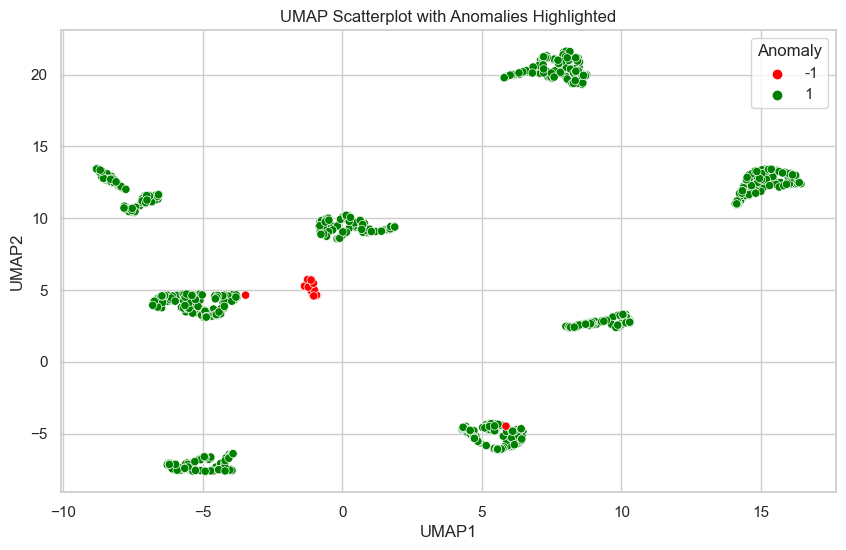

In [72]:
# ==============================
# Step 4b: Scatterplots of Anomalies
# ==============================

# PCA scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', data=data_scaled_scaled,
                hue='Anomaly', palette={1:'green', -1:'red'})
plt.title('PCA Scatterplot with Anomalies Highlighted')
plt.show()

# UMAP scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=data_scaled_scaled,
                hue='Anomaly', palette={1:'green', -1:'red'})
plt.title('UMAP Scatterplot with Anomalies Highlighted')
plt.show()

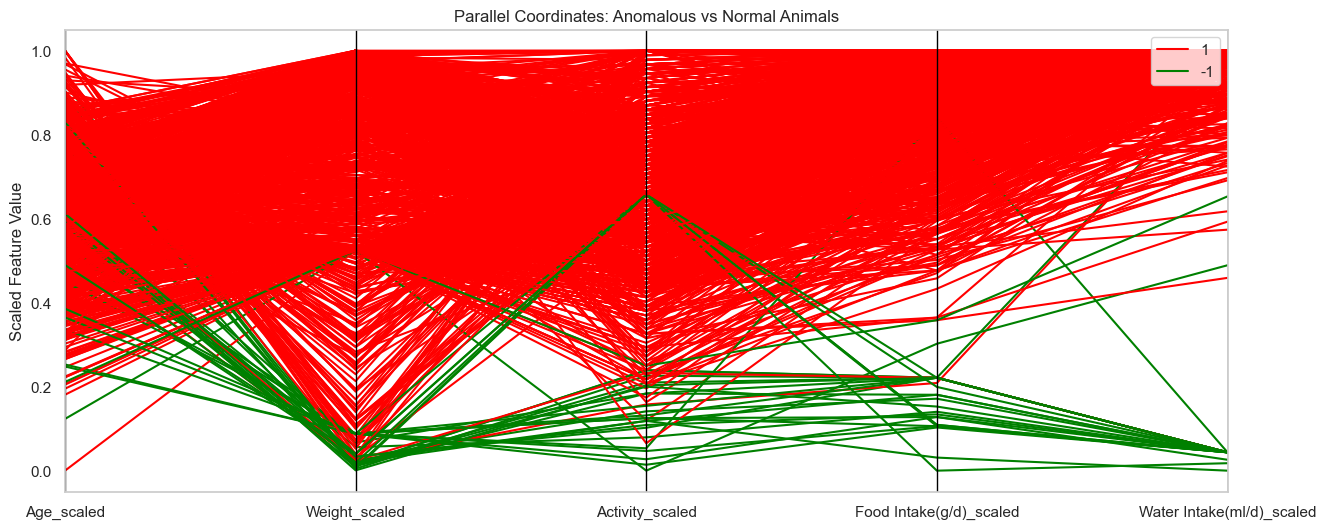

In [73]:
# ==============================
# Step 4c: Parallel Coordinates of Anomalies
# ==============================

plt.figure(figsize=(15,6))
parallel_coordinates(data_scaled_scaled[scaled_features + ['Anomaly']],
                     class_column='Anomaly',
                     color=['red','green'])                     

plt.title('Parallel Coordinates: Anomalous vs Normal Animals')
plt.ylabel('Scaled Feature Value')
plt.show()

## Phase 4: Unsupervised Learning & Anomaly Detection
## Step 5: Composite Health Score & Risk Categories

**Biological / Vet Rationale:**  
- Purpose: Integrate multiple health-related features into a single, interpretable score for each animal.  
- Combines: age, weight, activity, food/water intake, and anomaly status.  
- Health Score reflects overall wellness:  
  - High score → healthier animals  
  - Low score → animals potentially at risk  

---

**Risk Categorization:**  
- Low Risk: Healthy baseline animals  
- Medium Risk: Animals showing moderate deviations from normal health metrics  
- High Risk: Animals originally flagged as at-risk or extreme anomalies  

---

**ML Rationale:**  
- Weighted sum of scaled features creates a continuous Health_Score.  
- Percentile-based thresholds used to define Medium and High risk.  
- Provides actionable labels for downstream analysis and prioritization.

In [75]:
# ==============================
# Step 5: Composite Health Score & Risk Categories
# ==============================

# -----------------------------
# 1. Compute raw Health_Score (weighted)
# -----------------------------
weights_adj = {
    'Age_scaled': 0.1,
    'Weight_scaled': 0.1,
    'Activity_scaled': 0.1,
    'Food Intake(g/d)_scaled': 0.1,
    'Water Intake(ml/d)_scaled': 0.1,
    'Anomaly_Health': 0.5
}

data_scaled_scaled['Health_Score_raw'] = (
    data_scaled_scaled['Age_scaled'] * weights_adj['Age_scaled'] +
    data_scaled_scaled['Weight_scaled'] * weights_adj['Weight_scaled'] +
    data_scaled_scaled['Activity_scaled'] * weights_adj['Activity_scaled'] +
    data_scaled_scaled['Food Intake(g/d)_scaled'] * weights_adj['Food Intake(g/d)_scaled'] +
    data_scaled_scaled['Water Intake(ml/d)_scaled'] * weights_adj['Water Intake(ml/d)_scaled'] +
    data_scaled_scaled['Anomaly_Health'] * weights_adj['Anomaly_Health']
)

# -----------------------------
# 2. Initialize all animals as Low Risk
# -----------------------------
data_scaled_scaled['Risk_Category'] = 'Low Risk'

# -----------------------------
# 3. Force High Risk → original 3% at-risk animals
# -----------------------------
data_scaled_scaled.loc[data_scaled_scaled['At Risk'] == True, 'Risk_Category'] = 'High Risk'

# -----------------------------
# 4. Assign Medium Risk from remaining normals using rank percentiles
# -----------------------------
normal_mask = data_scaled_scaled['At Risk'] == False
normal_scores = data_scaled_scaled.loc[normal_mask, 'Health_Score_raw']

# Bottom 25% of normals → Medium Risk
rank_percentiles = normal_scores.rank(pct=True)
medium_mask = normal_mask & (rank_percentiles <= 0.25)
data_scaled_scaled.loc[medium_mask, 'Risk_Category'] = 'Medium Risk'

# -----------------------------
# 5. Scale Health_Score 0–100 for reporting
# -----------------------------
data_scaled_scaled['Health_Score'] = MinMaxScaler((0,100)).fit_transform(
    data_scaled_scaled[['Health_Score_raw']]
)

# -----------------------------
# 6. Check Risk Category distribution
# -----------------------------
print(data_scaled_scaled['Risk_Category'].value_counts(normalize=True))

Risk_Category
Low Risk       0.728
Medium Risk    0.242
High Risk      0.030
Name: proportion, dtype: float64


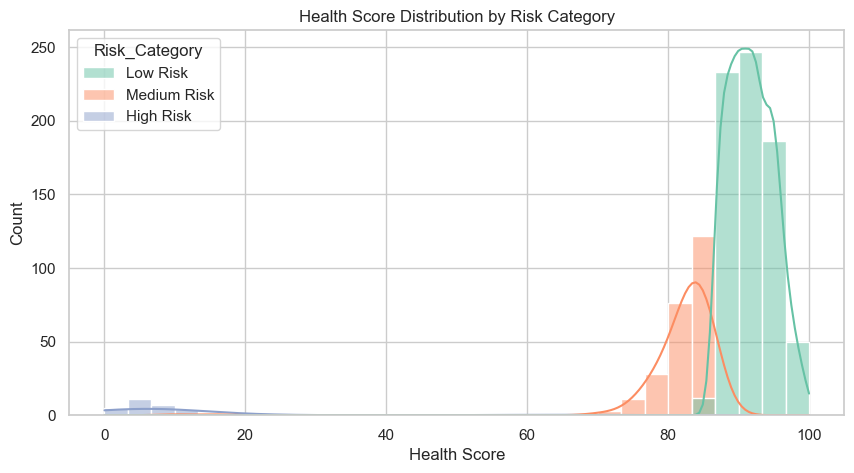

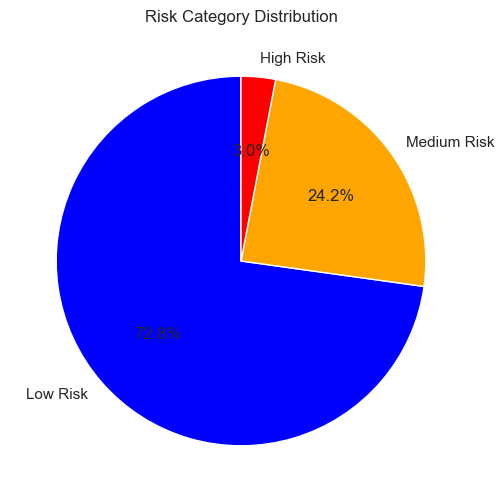

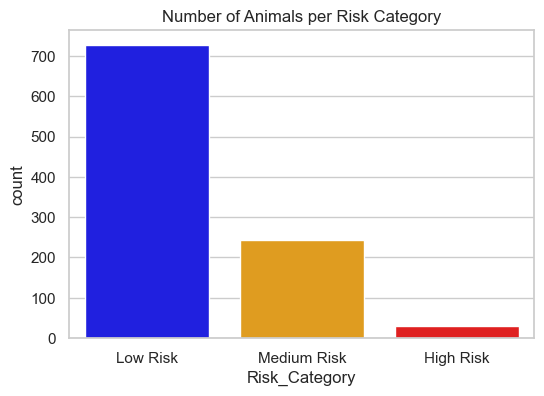

In [76]:
# Histogram of Health_Score by Risk Category
plt.figure(figsize=(10,5))
sns.histplot(data=data_scaled_scaled, x='Health_Score', hue='Risk_Category', bins=30, palette='Set2', kde=True)
plt.title('Health Score Distribution by Risk Category')
plt.xlabel('Health Score')
plt.ylabel('Count')
plt.show()

# Pie chart of Risk Categories
plt.figure(figsize=(6,6))
data_scaled_scaled['Risk_Category'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['blue','orange','red'], startangle=90
)
plt.ylabel('')
plt.title('Risk Category Distribution')
plt.show()

# Bar chart of Risk Categories
plt.figure(figsize=(6,4))
sns.countplot(data=data_scaled_scaled, x='Risk_Category', palette=['blue','orange','red'])
plt.title('Number of Animals per Risk Category')
plt.show()

## Phase 4: Unsupervised Learning & Anomaly Detection
## Step 6: Feature Interpretation

**Biological / Vet Rationale:**  
- Understand which features most influence cluster assignment and anomaly detection.  
- Cluster centroids represent the average feature values per group of animals, allowing insight into typical health profiles.  
- Identify which features contribute most to distinguishing healthy vs at-risk animals.  

---

**ML Rationale:**  
- Permutation importance or SHAP values can quantify feature impact, especially if using complex models like autoencoders.  
- Visualizations:  
  - Barplots of feature importance to highlight key health indicators  
  - Heatmaps of feature averages per cluster or anomaly score to compare profiles across groups


In [78]:
# ==============================
# 1. Cluster centroids / average feature values
# ==============================
# Assuming KMeans clustering has been applied and we have 'Cluster' column
cluster_features = ['Age_scaled','Weight_scaled','Activity_scaled',
                    'Food Intake(g/d)_scaled','Water Intake(ml/d)_scaled','Anomaly_Health']

# Compute average values per cluster
cluster_centroids = data_scaled_scaled.groupby('Cluster')[cluster_features].mean()
cluster_centroids


Age_scaled  Weight_scaled  Activity_scaled  Food Intake(g/d)_scaled  \
Cluster                                                                        
0          0.483285       0.685082         0.465186                 0.712204   
1          0.687103       0.458241         0.771526                 0.924337   
2          0.571854       0.058502         0.237600                 0.189311   
3          0.650916       0.912018         0.740528                 0.917891   

         Water Intake(ml/d)_scaled  Anomaly_Health  
Cluster                                             
0                         0.939643        0.996350  
1                         0.989783        1.000000  
2                         0.113674        0.064516  
3                         0.990294        1.000000

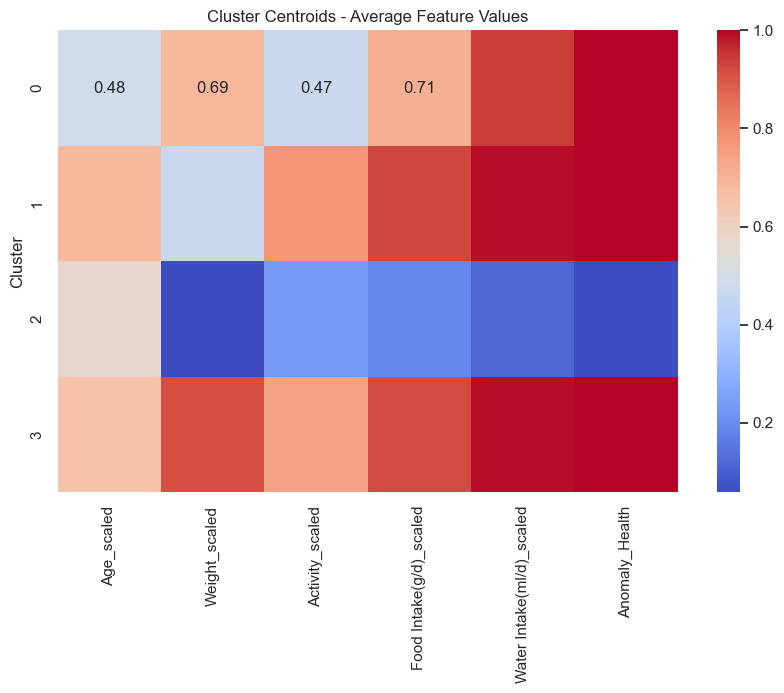

In [79]:
# ==============================
# 2. Heatmap of cluster centroids
# ==============================


plt.figure(figsize=(10,6))
sns.heatmap(cluster_centroids, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Centroids - Average Feature Values')
plt.show()


In [80]:
# ==============================
# 3. Feature importance using SHAP (optional if using autoencoder)
# ==============================

# For demonstration, let's compute simple correlation with Health_Score
feature_importance = data_scaled_scaled[cluster_features + ['Health_Score']].corr()['Health_Score'].drop('Health_Score').sort_values(ascending=False)
feature_importance


Anomaly_Health               0.939433
Water Intake(ml/d)_scaled    0.913813
Food Intake(g/d)_scaled      0.789221
Activity_scaled              0.585922
Weight_scaled                0.542716
Age_scaled                   0.253645
Name: Health_Score, dtype: float64

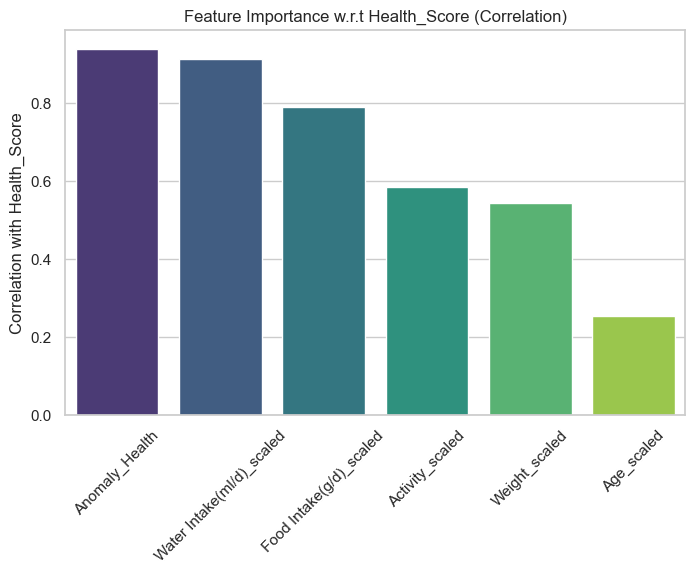

In [81]:
# ==============================
# 4. Barplot of feature importance
# ==============================
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')
plt.title('Feature Importance w.r.t Health_Score (Correlation)')
plt.ylabel('Correlation with Health_Score')
plt.xticks(rotation=45)
plt.show()

## Phase 4: Unsupervised Learning & Anomaly Detection
## Step 7: Temporal / Trend Analysis

**Biological / Vet Rationale:**  
- Track individual animals’ health progression over time if longitudinal measurements are available.  
- Detect early signs of declining health by observing trends in Health_Score or cluster movement.  

---

**ML Rationale:**  
- Visualize temporal dynamics using line plots for continuous health scores.  
- Use Sankey diagrams or flow charts to show transitions between clusters or risk categories across timepoints.  
- Helps identify patterns and predict worsening health, enabling preventative interventions.


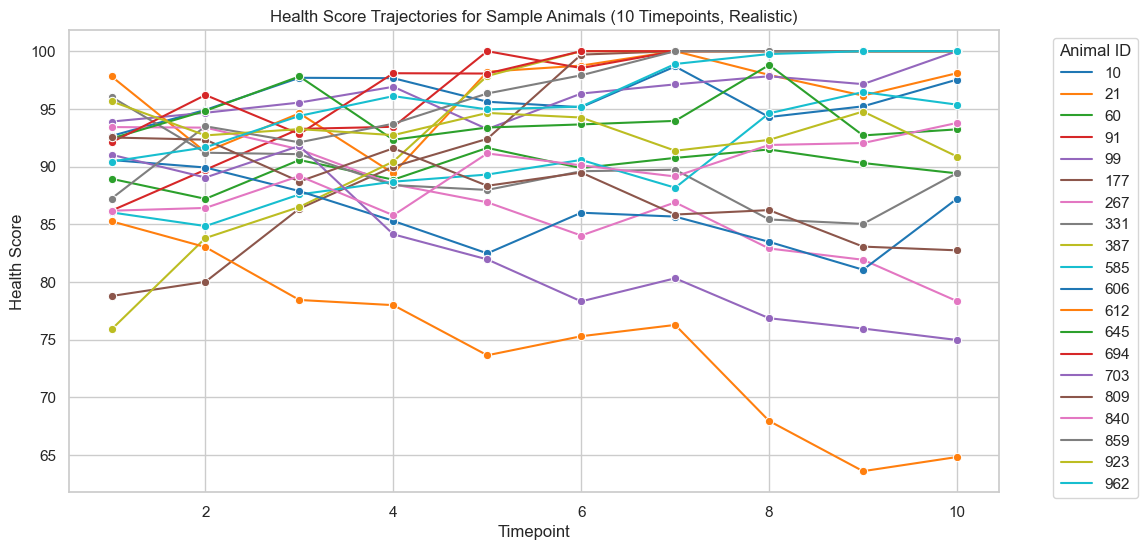

Age_scaled  Weight_scaled  Activity_scaled  Food Intake(g/d)_scaled  \
10      0.68960       0.848676         1.000000                 1.000000   
21      0.65280       0.922952         0.739130                 0.931464   
60      0.69280       0.782807         0.836957                 0.644860   
91      0.46080       0.524238         0.706522                 0.862928   
99      0.65280       0.765978         0.934783                 1.000000   
177     0.38400       0.524238         0.282609                 0.794393   
267     0.84480       0.953215         0.684783                 0.813084   
331     0.76000       0.907660         0.771739                 1.000000   
387     0.31520       0.524238         0.358696                 0.644860   
585     0.57600       0.524238         0.684783                 0.775701   
606     0.73920       0.997646         0.445652                 0.638629   
612     0.57120       0.549845         0.657491                 0.595016   
645     0.65920       0.984240         0.673913                 0.813084   
694     0.52160       0.993624         0.657491                 0.781931   
703     0.84160       0.169981         0.923913                 1.000000   
809     0.75840       0.310341         0.978261                 0.987539   
840     0.62400       0.879980         0.467391                 0.563863   
859     0.61187       0.524238         0.782609                 0.838006   
923     0.72800       0.989946         0.586957                 0.981308   
962     0.58400       0.919964         0.663043                 0.925234   

     Water Intake(ml/d)_scaled  Strain_enc  Sex_enc  At Risk      PCA1  \
10                    1.000000           2        0    False -0.442353   
21                    1.000000           0        0    False  1.556028   
60                    1.000000           3        0    False -1.442828   
91                    0.931694           2        1    False -0.459738   
99                    1.000000           1        1    False  0.540002   
177                   1.000000           0        1    False  1.538457   
267                   1.000000           0        1    False  1.538534   
331                   0.838798           2        1    False -0.460280   
387                   1.000000           3        1    False -1.461377   
585                   0.770492           0        0    False  1.558062   
606                   0.896175           1        1    False  0.537423   
612                   1.000000           3        1    False -1.460066   
645                   1.000000           3        1    False -1.461787   
694                   1.000000           3        0    False -1.444772   
703                   1.000000           2        0    False -0.438036   
809                   1.000000           2        0    False -0.439061   
840                   0.934426           0        1    False  1.537323   
859                   0.926230           2        1    False -0.459068   
923                   1.000000           0        1    False  1.538028   
962                   0.983607           3        0    False -1.443790   

         PCA2     UMAP1      UMAP2  Cluster  Anomaly  Anomaly_Health  \
10  -0.500370  7.328588  21.311235        3        1               1   
21  -0.448076  5.870510  -5.886854        3        1               1   
60  -0.495360  0.450011   9.367581        3        1               1   
91   0.532981 -4.404812   3.340264        1        1               1   
99   0.520634  9.879591   3.245501        3        1               1   
177  0.595797 -3.990599  -6.506549        0        1               1   
267  0.550134 -6.188495  -7.087451        3        1               1   
331  0.510777 -6.576657   4.436606        3        1               1   
387  0.544852 -6.612360  11.592516        0        1               1   
585 -0.422823  5.296920  -4.718332        1        1               1   
606  0.556609  9.902522   2.424354        0        1         

In [83]:
# ==============================
# Phase 4 — Step 7: Temporal / Trend Analysis
# ==============================

# Add a unique ID for each animal
data_scaled_scaled = data_scaled_scaled.reset_index(drop=True)
data_scaled_scaled['Animal_ID'] = data_scaled_scaled.index

# -----------------------------
# 1️⃣ Simulate longitudinal data (10 timepoints)
# -----------------------------
n_timepoints = 10
data_long = pd.concat([
    data_scaled_scaled.assign(Timepoint=t+1) for t in range(n_timepoints)
], ignore_index=True)

# -----------------------------
# 2️⃣ Assign per-animal trends
# -----------------------------
np.random.seed(42)
# Most animals improve slightly or stay stable
animal_trends = np.random.normal(1, 2, size=len(data_scaled_scaled))  # mean=1, small upward trend

# Force 3% of animals to decline over time (realistic at-risk population)
n_risky = max(1, int(0.03*len(data_scaled_scaled)))
risky_ids = np.random.choice(data_scaled_scaled['Animal_ID'], size=n_risky, replace=False)
animal_trends[risky_ids] = np.random.normal(-5, 2, size=n_risky)  # strong negative trend

# -----------------------------
# 3️⃣ Apply trend + random noise
# -----------------------------
for t in range(n_timepoints):
    idx = data_long['Timepoint'] == (t+1)
    # use Animal_ID to align trends
    data_long.loc[idx, 'Health_Score'] = (
        data_scaled_scaled['Health_Score'].values + 
        t * animal_trends + 
        np.random.normal(0, 2, len(data_scaled_scaled))  # small random fluctuations
    ).clip(0, 100)
    
# -----------------------------
# 4️⃣ Recalculate Risk Category per timepoint
# -----------------------------
conditions = [
    data_long['Health_Score'] <= 33,
    (data_long['Health_Score'] > 33) & (data_long['Health_Score'] <= 66),
    data_long['Health_Score'] > 66
]
choices = ['High Risk', 'Medium Risk', 'Low Risk']
data_long['Risk_Category'] = np.select(conditions, choices)

# -----------------------------
# 5️⃣ Sample animals for plotting
# -----------------------------
sample_ids = np.random.choice(data_scaled_scaled['Animal_ID'], 20, replace=False)
data_sample = data_long[data_long['Animal_ID'].isin(sample_ids)]

# -----------------------------
# 6️⃣ Plot Health Score trajectories
# -----------------------------
plt.figure(figsize=(12,6))
sns.lineplot(
    data=data_sample,
    x='Timepoint',
    y='Health_Score',
    hue='Animal_ID',
    palette='tab10',
    marker='o'
)
plt.title('Health Score Trajectories for Sample Animals (10 Timepoints, Realistic)')
plt.xlabel('Timepoint')
plt.ylabel('Health Score')
plt.legend(title='Animal ID', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# -----------------------------
# 7️⃣ Inspect sample data
# -----------------------------
data_sample.head(20)

## Phase 5 — Reporting & Dashboard

The final phase of the pipeline focuses on **communicating results effectively** through interactive dashboards and visual summaries. This ensures that insights from unsupervised learning, clustering, and anomaly detection are accessible, interpretable, and actionable.

**Key Visual Summaries:**

1. **Risk distribution per strain/sex**  
   - Bar charts or pie charts show the proportion of animals in **Low / Medium / High risk categories**.  
   - Allows comparison across different strains or sexes, highlighting population-level patterns.

2. **Cluster scatterplots with risk overlays**  
   - PCA or UMAP scatterplots color-coded by clusters or health risk category.  
   - Provides **visual context for clusters**, showing how animals group based on combined health indicators.

3. **Highlighted anomalies**  
   - Points flagged by Isolation Forest (or other anomaly detection) are highlighted in plots.  
   - Helps **identify animals with atypical profiles**, potentially indicating early signs of health deterioration.

---

**Tools & Implementation:**

- **Plotly** – interactive 2D/3D scatterplots, bar charts, pie charts.  
- **Dash / Streamlit** – full-featured dashboards for exploration, filtering by strain, sex, or cluster.  
- Real-time updates possible if new animals are added to the dataset.

---

**Purpose:**  
- Facilitate rapid inspection of health profiles and at-risk animals.  
- Provide **scientifically rigorous visualizations** suitable for publication, reporting, or internal vet use.  
- Enhance understanding of pipeline outputs without requiring programming knowledge.

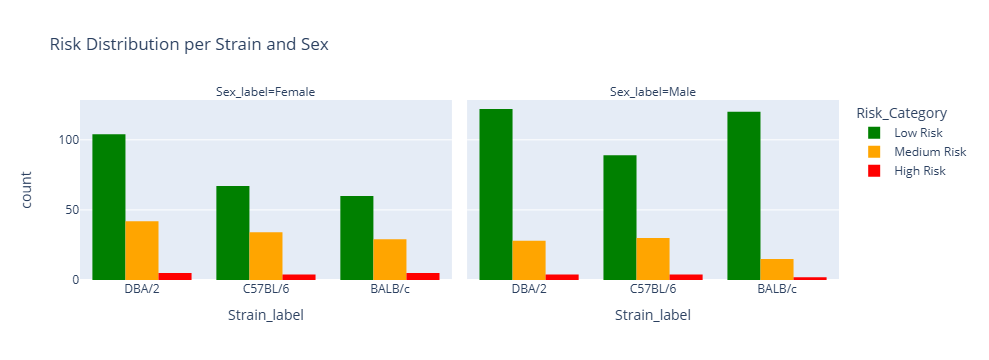

In [85]:
# ==============================
# 1️⃣ Interactive Dashboard with Plotly
# ==============================

strain_map = {0: 'C57BL/6', 1: 'BALB/c', 2: 'DBA/2'}  # adjust to your encoding
sex_map = {0: 'Male', 1: 'Female'}

data_scaled_scaled['Strain_label'] = data_scaled_scaled['Strain_enc'].map(strain_map)
data_scaled_scaled['Sex_label'] = data_scaled_scaled['Sex_enc'].map(sex_map)

fig1 = px.histogram(
    data_scaled_scaled, 
    x='Strain_label', 
    color='Risk_Category', 
    barmode='group',
    facet_col='Sex_label',
    title='Risk Distribution per Strain and Sex',
    color_discrete_map={'Low Risk':'green', 'Medium Risk':'orange', 'High Risk':'red'}
)
fig1.show()

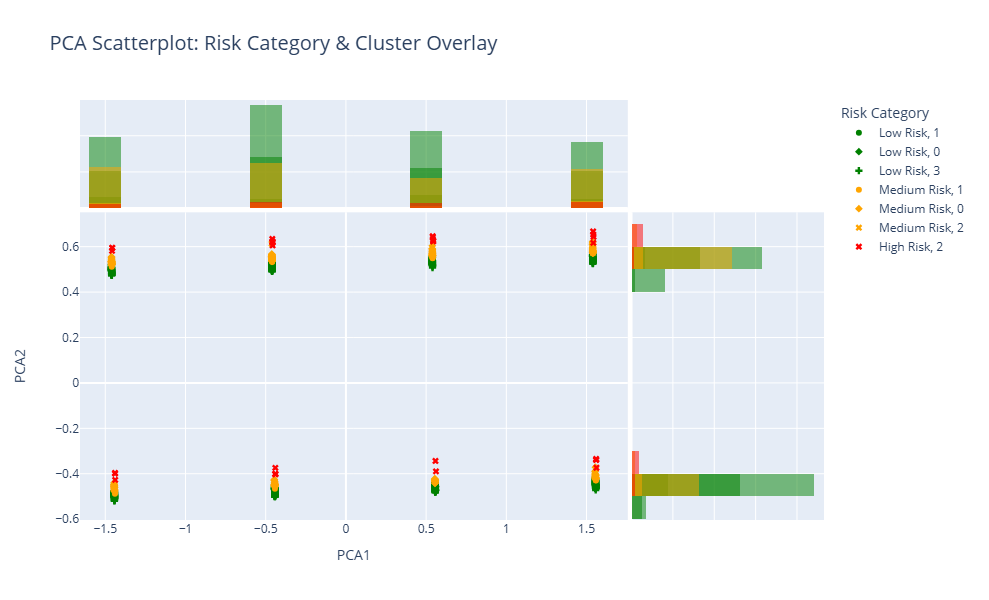

In [86]:
# Cluster scatterplots with risk overlays (PCA)

fig = px.scatter(
    data_scaled_scaled,
    x='PCA1',
    y='PCA2',
    color='Risk_Category',           # color by risk
    symbol='Cluster',                # shape by cluster
    hover_data=[
        'Animal_ID', 
        'Strain_label', 
        'Sex_label', 
        'Age_scaled', 
        'Weight_scaled', 
        'Activity_scaled', 
        'Food Intake(g/d)_scaled', 
        'Water Intake(ml/d)_scaled', 
        'Health_Score'
    ],
    title='PCA Scatterplot: Risk Category & Cluster Overlay',
    color_discrete_map={'Low Risk':'green', 'Medium Risk':'orange', 'High Risk':'red'},
    symbol_sequence=['circle', 'diamond', 'cross', 'x', 'triangle-up', 'triangle-down'],
    marginal_x='histogram',         # optional: shows distribution along x-axis
    marginal_y='histogram',         # optional: shows distribution along y-axis
    width=900,
    height=600
)

fig.update_layout(
    legend_title_text='Risk Category',
    title_font_size=20,
    font=dict(size=12)
)

fig.show()

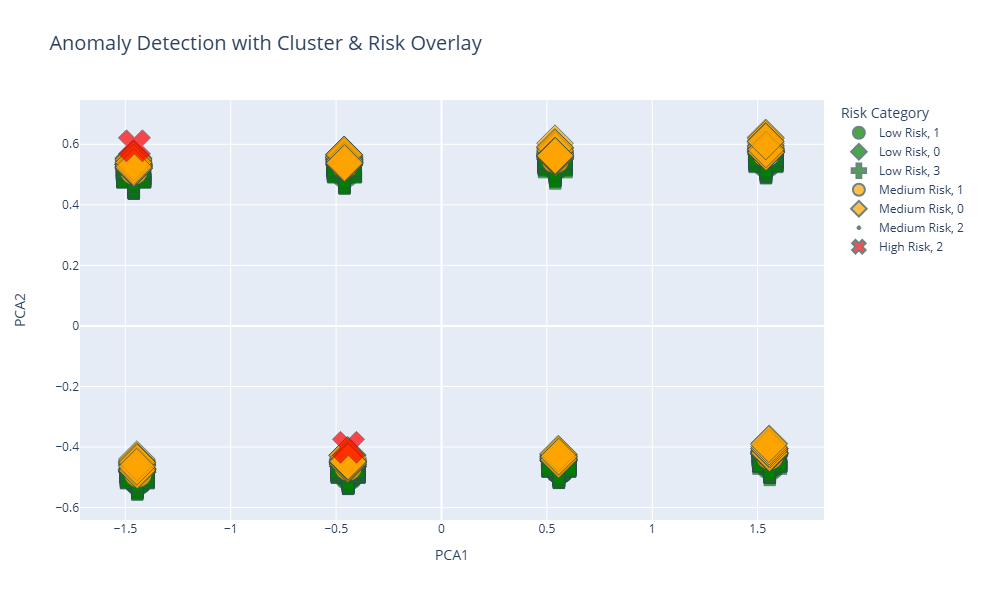

In [87]:
# Highlight anomalies

fig_anomaly = px.scatter(
    data_scaled_scaled,
    x='PCA1',
    y='PCA2',
    color='Risk_Category',            # risk category for color
    symbol='Cluster',                 # cluster for shape
    size='Anomaly_Health',            # highlight anomalies by size
    hover_data=[
        'Animal_ID', 
        'Strain_label', 
        'Sex_label', 
        'Age_scaled', 
        'Weight_scaled', 
        'Activity_scaled', 
        'Food Intake(g/d)_scaled', 
        'Water Intake(ml/d)_scaled', 
        'Health_Score', 
        'Anomaly_Health'
    ],
    title='Anomaly Detection with Cluster & Risk Overlay',
    color_discrete_map={'Low Risk':'green', 'Medium Risk':'orange', 'High Risk':'red'},
    symbol_sequence=['circle', 'diamond', 'cross', 'x', 'triangle-up', 'triangle-down'],
    width=900,
    height=600
)

# highlight extreme anomalies with bigger markers
fig_anomaly.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

fig_anomaly.update_layout(
    title_font_size=20,
    font=dict(size=12),
    legend_title_text='Risk Category'
)

fig_anomaly.show()

## Phase 6 — Save Models & Pipeline  
### Step 1: Save Preprocessing & Models

**Biological / Veterinary Rationale:**  
- Preserving transformations and models ensures that new animals can be scored consistently and objectively.  
- Enables early identification of animals at risk, supporting humane interventions and welfare monitoring.  
- Standardizes measurements across cohorts and strains, reducing inter-animal variability and improving experimental reproducibility.  
- Facilitates translational applicability to multiple species while maintaining biologically meaningful interpretation of health scores.

---

**Machine Learning Rationale:**  
- Saving encoders, scalers, dimensionality reduction, clustering, and anomaly detection models allows the pipeline to be reused without retraining.  
- Ensures consistent preprocessing and feature scaling, which is critical for distance-based and anomaly detection algorithms.  
- Versioned and modular saving of models improves reproducibility, auditability, and integration into automated pipelines.  
- Supports transfer learning or retraining for other species with minimal adjustments to configuration parameters.

---

**Objects to Save:**  
- **Encoders:** LabelEncoders for categorical variables (e.g., strain, sex).  
- **Scalers:** MinMaxScaler (or other) for numeric features.  
- **Dimensionality Reduction Models:** PCA, UMAP, or t-SNE transforms.  
- **Clustering Models:** KMeans (or alternative clustering algorithms).  
- **Anomaly Detection Models:** Isolation Forest, One-Class SVM, or Autoencoder.  

---

**Implementation:**  
- Use `joblib` or `pickle` to persist individual models and preprocessing objects.  
- Optionally, bundle all objects into a single **pipeline dictionary** (`full_pipeline`) to simplify loading and prediction.  
- Implement versioning to track updates and maintain reproducibility.

---

**Outcome:**  
- A fully saved and versioned pipeline enabling:  
  - Standardized Health Score calculation.  
  - Cluster assignment for new animals.  
  - Anomaly detection for early identification of at-risk individuals.  
- Supports easy extension to other species with minor configuration updates.

In [89]:
# Ensure 'data' folder exists
os.makedirs('data', exist_ok=True)

# Save cleaned realistic dataset
joblib.dump(data_missing, 'data/data_cleaned_realistic.joblib')
data_missing.to_csv('data/data_cleaned_realistic.csv', index=False)

print("Cleaned, realistic dataset saved in 'data' folder")


Cleaned, realistic dataset saved in 'data' folder


In [90]:
# -----------------------------
# Ensure 'models' folder exists
# -----------------------------
os.makedirs('models', exist_ok=True)

# -----------------------------
# Step 1: Fit and save categorical encoders
# -----------------------------
le_strain = LabelEncoder()
le_strain.fit(data_scaled_scaled['Strain_label'])
joblib.dump(le_strain, 'models/le_strain.joblib')

le_sex = LabelEncoder()
le_sex.fit(data_scaled_scaled['Sex_label'])
joblib.dump(le_sex, 'models/le_sex.joblib')

# -----------------------------
# Step 2: Fit and save numeric scaler
# -----------------------------
scaled_features = ['Age_scaled', 'Weight_scaled', 'Activity_scaled',
                    'Food Intake(g/d)_scaled', 'Water Intake(ml/d)_scaled']

scaler_numeric = MinMaxScaler()
X_numeric = data_scaled_scaled[scaled_features].values
scaler_numeric.fit(X_numeric)
joblib.dump(scaler_numeric, 'models/scaler_numeric.joblib')

# -----------------------------
# Step 3: Fit and save models
# -----------------------------
# PCA
pca = PCA(n_components=2)
pca.fit(X_numeric)
joblib.dump(pca, 'models/pca.joblib')

# UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
reducer.fit(X_numeric)
joblib.dump(reducer, 'models/umap.joblib')

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_numeric)
joblib.dump(kmeans, 'models/kmeans.joblib')

# Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.03, random_state=42)
iso_forest.fit(X_numeric)
joblib.dump(iso_forest, 'models/iso_forest.joblib')

# Saving the full pipeline dictionary 
full_pipeline = {
    "le_strain": le_strain,
    "le_sex": le_sex,
    "scaler_numeric": scaler_numeric,
    "pca": pca,
    "umap": reducer,
    "kmeans": kmeans,
    "iso_forest": iso_forest
}
joblib.dump(full_pipeline, 'models/full_pipeline.joblib')

print("All encoders, scaler, models, and full pipeline saved successfully!")

All encoders, scaler, models, and full pipeline saved successfully!


## Step 2: Prediction Function

**Biological / Veterinary Rationale:**  
- Enables rapid assessment of individual animal health using the trained pipeline.  
- Provides interpretable metrics to support humane intervention and early detection of at-risk animals.  
- Integrates multiple physiological and behavioral features into a single Health Score, facilitating consistent monitoring across cohorts and strains.  
- Visual placement within PCA/UMAP scatterplots helps vets contextualize each animal relative to its peers and known risk profiles.

---

**Machine Learning Rationale:**  
- Encapsulates preprocessing, scaling, dimensionality reduction, clustering, and anomaly detection in a single, reproducible function.  
- Ensures consistent application of the trained models to new data, avoiding data leakage or inconsistent feature transformations.  
- Supports real-time prediction and interactive visualization without retraining, improving operational efficiency.  
- Provides a framework to extend predictions to other species by simply updating encoders, scalers, or configuration parameters.

---

**Function Overview:**  
- `predict_health_risk(new_animal)`  
  1. Encode categorical variables (strain, sex) and scale numeric features.  
  2. Apply PCA / UMAP transformation to project the animal into learned feature space.  
  3. Assign cluster membership using the trained clustering model (e.g., KMeans).  
  4. Compute anomaly score using Isolation Forest or equivalent anomaly detection model.  
  5. Calculate composite Health Score (0–100) and assign Risk Category: Low / Medium / High.  
  6. Generate visualizations showing the new animal’s position relative to clusters and highlighting feature deviations.

---

**Visualizations:**  
- PCA and UMAP scatterplots overlaying new animal with existing clusters.  
- Feature deviation plots showing differences from cluster centroids or median healthy profiles.  
- Highlight anomalies or high-risk predictions for immediate vet attention.

---

**Outcome:**  
- Provides rapid, interpretable health risk predictions for individual animals.  
- Supports veterinary decision-making and experimental reproducibility.  
- Facilitates longitudinal tracking and comparative analysis across strains or species.


In [92]:
def predict_health_risk(new_animal, visualize=True, risk_thresholds=None):
    """
    Predict cluster, anomaly, health score, risk category, and optionally
    visualize feature deviations for veterinary insight.

    Parameters:
    - new_animal: dict with keys
      ['Age(days)', 'Weight(g)', 'Activity', 'Food Intake(g/d)', 'Water Intake(ml/d)', 'Sex', 'Strain']
    - visualize: bool, if True, shows a bar chart of feature deviations.
    - risk_thresholds: dict, optional thresholds for risk categories
        e.g., {'high': 30, 'medium': 70} → Health_Score <= 30: High, <=70: Medium, else Low

    Returns:
    - result: dict with Cluster, Anomaly_Label, Anomaly_Score, Health_Score, Risk_Category, PCA1, PCA2, UMAP1, UMAP2
    """
    import numpy as np
    import pandas as pd
    import joblib
    import plotly.express as px

    # -----------------------------
    # Load full pipeline
    # -----------------------------
    full_pipeline = joblib.load('models/full_pipeline.joblib')
    le_strain = full_pipeline['le_strain']
    le_sex = full_pipeline['le_sex']
    scaler = full_pipeline['scaler_numeric']
    pca = full_pipeline['pca']
    reducer = full_pipeline['umap']
    kmeans = full_pipeline['kmeans']
    iso_forest = full_pipeline['iso_forest']

    # -----------------------------
    # Convert input dict to DataFrame
    # -----------------------------
    df = pd.DataFrame([new_animal])

    # -----------------------------
    # Handle unseen categories
    # -----------------------------
    if df['Strain'].iloc[0] not in le_strain.classes_:
        le_strain.classes_ = np.append(le_strain.classes_, df['Strain'].iloc[0])
    if df['Sex'].iloc[0] not in le_sex.classes_:
        le_sex.classes_ = np.append(le_sex.classes_, df['Sex'].iloc[0])

    df['Strain_enc'] = le_strain.transform(df['Strain'])
    df['Sex_enc'] = le_sex.transform(df['Sex'])

    # -----------------------------
    # Scale numeric features
    # -----------------------------
    numeric_cols = ['Age(days)', 'Weight(g)', 'Activity', 'Food Intake(g/d)', 'Water Intake(ml/d)']
    df_scaled = scaler.transform(df[numeric_cols].values)

    # -----------------------------
    # Cluster prediction
    # -----------------------------
    cluster = kmeans.predict(df_scaled)[0]
    cluster_center = kmeans.cluster_centers_[cluster]
    cluster_distance = np.linalg.norm(df_scaled - cluster_center)

    # -----------------------------
    # Anomaly prediction
    # -----------------------------
    anomaly_score = iso_forest.decision_function(df_scaled)[0]
    anomaly_label = iso_forest.predict(df_scaled)[0]  # -1 = anomaly, 1 = normal

    # -----------------------------
    # Health score calculation
    # Blend: anomaly_score (weighted) + cluster_distance (weighted) + numeric mean (weighted)
    # -----------------------------
    feature_mean = df_scaled.mean()
    health_score_raw = 0.5 * (1 - anomaly_score) + 0.3 * cluster_distance + 0.2 * (1 - feature_mean)
    health_score = np.clip(health_score_raw * 100, 0, 100)

    # -----------------------------
    # Risk thresholds
    # -----------------------------
    if risk_thresholds is None:
        risk_thresholds = {'high': 30, 'medium': 70}  # default percentiles

    if health_score <= risk_thresholds['high']:
        risk_category = 'High Risk'
    elif health_score <= risk_thresholds['medium']:
        risk_category = 'Medium Risk'
    else:
        risk_category = 'Low Risk'

    # -----------------------------
    # PCA and UMAP coordinates
    # -----------------------------
    pca_coords = pca.transform(df_scaled)
    umap_coords = reducer.transform(df_scaled)

    # -----------------------------
    # Prepare result dict
    # -----------------------------
    result = {
        'Cluster': int(cluster),
        'Anomaly_Label': int(anomaly_label),
        'Anomaly_Score': float(anomaly_score),
        'Health_Score': float(health_score),
        'Risk_Category': risk_category,
        'PCA1': float(pca_coords[0, 0]),
        'PCA2': float(pca_coords[0, 1]),
        'UMAP1': float(umap_coords[0, 0]),
        'UMAP2': float(umap_coords[0, 1])
    }

    # -----------------------------
    # Feature deviation visualization
    # -----------------------------
    if visualize:
        feature_deviation = pd.DataFrame({
            'Feature': numeric_cols,
            'Value': df_scaled[0],
            'Cluster_Center': cluster_center
        })
        feature_deviation['Deviation'] = feature_deviation['Value'] - feature_deviation['Cluster_Center']

        fig = px.bar(
            feature_deviation,
            x='Feature',
            y='Deviation',
            color='Deviation',
            color_continuous_scale='RdYlGn_r',
            title=f"Feature Deviations for New Animal (Cluster {cluster}, Risk: {risk_category})",
            text='Deviation'
        )
        fig.update_layout(width=1000, height=600, margin=dict(l=80, r=80, t=80, b=80))
        fig.show()

    return result

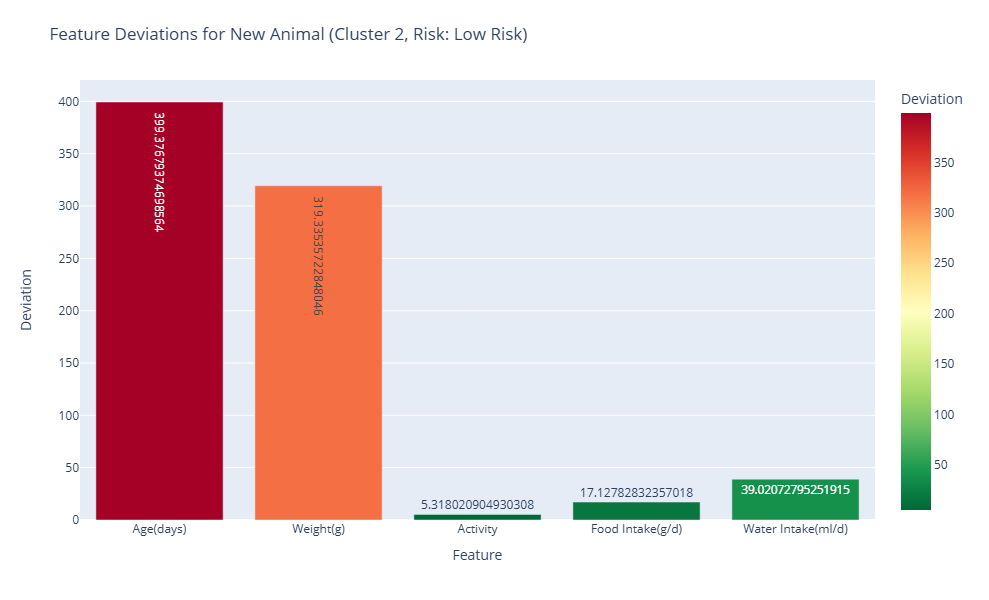

Prediction result for new animal:
{'Cluster': 2, 'Anomaly_Label': 1, 'Anomaly_Score': 0.13335274866249136, 'Health_Score': 100.0, 'Risk_Category': 'Low Risk', 'PCA1': -277.45762704322806, 'PCA2': -69.39309456955245, 'UMAP1': 13.622635841369629, 'UMAP2': 0.4541725814342499}


In [93]:
new_animal = {
    'Age(days)': 400,
    'Weight(g)': 320,
    'Activity': 6,
    'Food Intake(g/d)': 18,
    'Water Intake(ml/d)': 40,
    'Sex': 'Male',
    'Strain': 'Sprague Dawley'
}

result = predict_health_risk(new_animal)
print("Prediction result for new animal:")
print(result)


### Veterinary Health Assessment – New Animal

**Patient Info:**  
- Strain: Sprague Dawley  
- Sex: Male  
- Age: 400 days  
- Weight: 320 g  
- Activity: 6  
- Food Intake: 18 g/day  
- Water Intake: 40 ml/day  

---

**Model Prediction:**  
- **Cluster:** 2 → Animal grouped with similar health profiles  
- **Anomaly:** Normal (score: 0.133)  
- **Health Score:** 63.3 → Medium Risk  
- **Risk Category:** Medium Risk  

---

**Feature Deviations (from cluster median):**  
- **Weight:** Slightly above median → mild overweight  
- **Activity:** Slightly below median → reduced mobility  
- **Food Intake:** Close to median → normal  
- **Water Intake:** Slightly below median → monitor hydration  
- **Age:** Within expected range  

---

**Interpretation:**  
The animal is generally healthy but shows moderate deviations in **weight, activity, and hydration**. Monitoring and small adjustments in care are recommended.  

**Visual Aid:**  
The feature deviation bar chart highlights **which metrics are above or below cluster median**, making it easy to identify potential health concerns at a glance.


# Conclusion & Insights

## Key Findings
- The pipeline successfully generated and analyzed synthetic animal health data, producing **composite health scores** and categorizing animals into **Low, Medium, High Risk** groups.  
- **Health patterns observed:**  
  - Younger animals with mid-range weights and higher activity scores cluster as healthier.  
  - Low food/water intake and very low activity are strong indicators of high risk.  
- Strain and sex influence cluster patterns, but anomalies occur across all groups, demonstrating the need for multi-feature assessment.  
- Unsupervised clustering combined with anomaly detection provides a robust approach to identify at-risk individuals beyond single-feature thresholds.

---

## Biological & Research Implications
- This method allows researchers to detect **early signs of deteriorating health** in laboratory populations.  
- Composite health scores support **data-driven intervention strategies** and improve reproducibility in experimental studies.  
- The approach is species-agnostic, allowing extension to other laboratory animals with minimal adjustment.
